# Introduction to deep learning

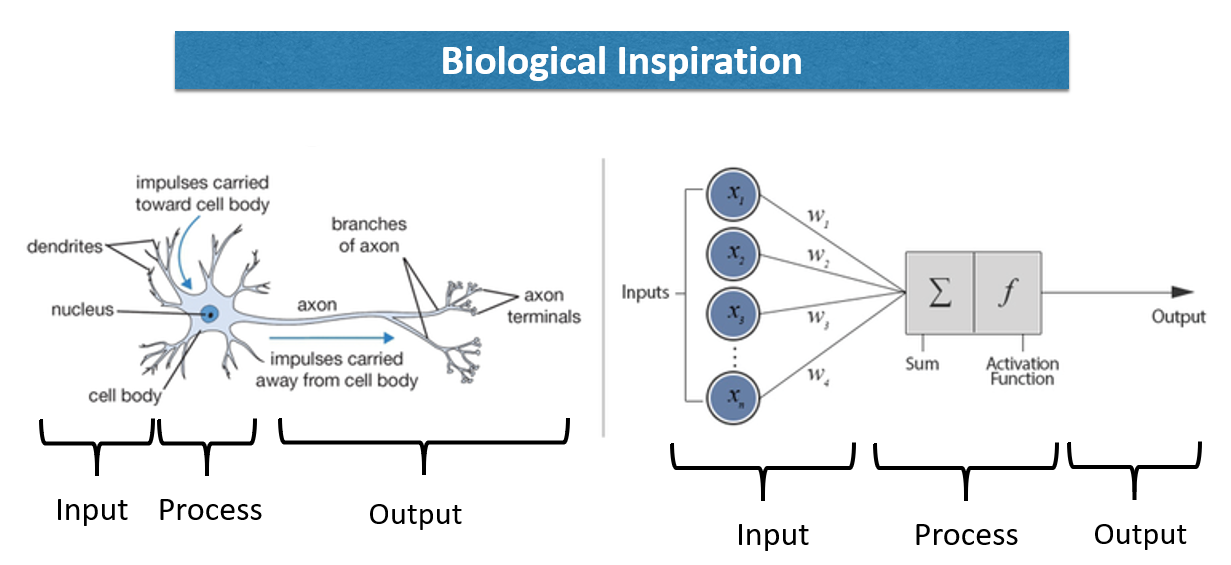

In [45]:
from IPython.display import Image
Image(filename="images/Picture4.png" ,width=700,height=700)

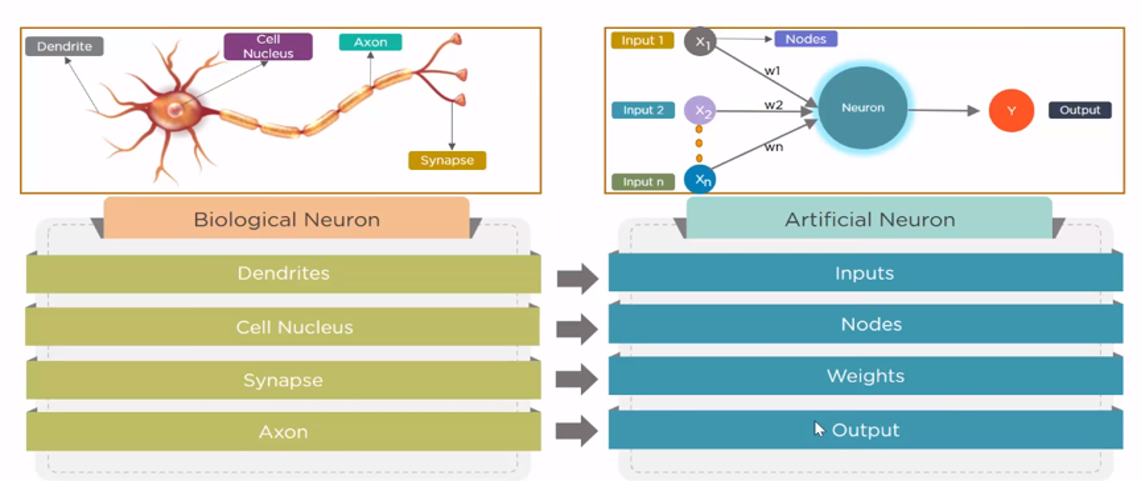

In [43]:
from IPython.display import Image
Image(filename="images/Picture5.png" ,width=800,height=700)

### Imagine you work for a bank

You need to predict how many transactions each customer will make next year

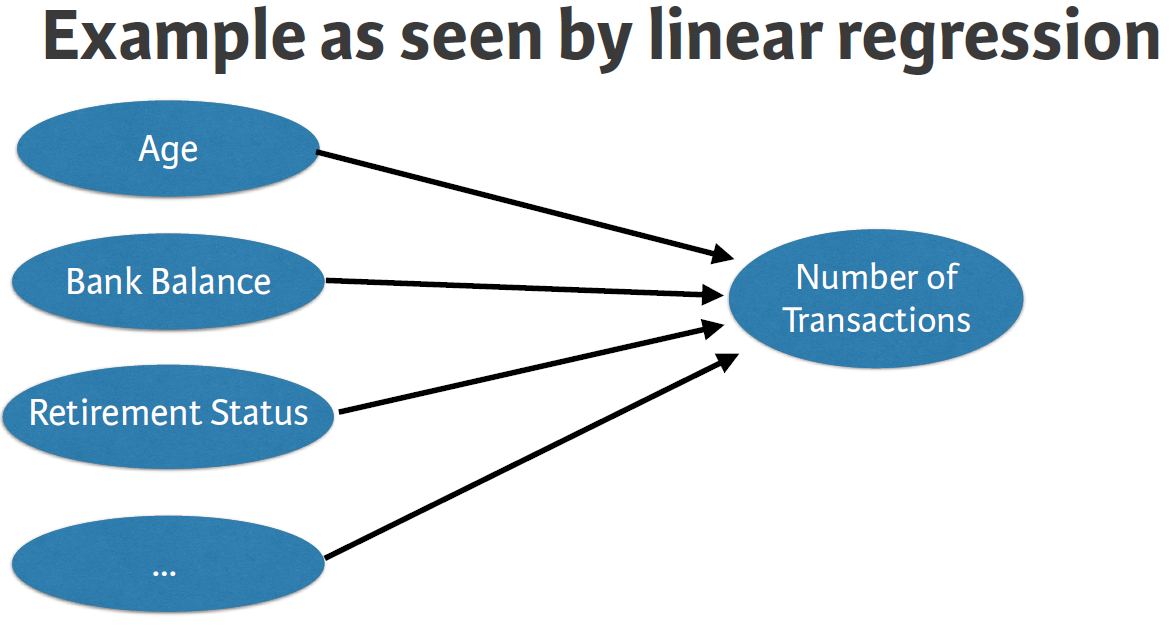

In [2]:
from IPython.display import Image
Image(filename="images/02.png" ,width=500,height=700)


The linear regression embeds an assumptions that the outcome .In this case how many transaction a user makes, is the sum of individual parts. its starts by saying what is the average .Then its add the effect of age. Then the effect of bank balance and so on.

So the linear regression model isn't identifying the interactions between these parts and how they affect the banking activity. Say we plot predictions from this model. We draw one line with the predictions for retired people, and another with the predictions for those still working.

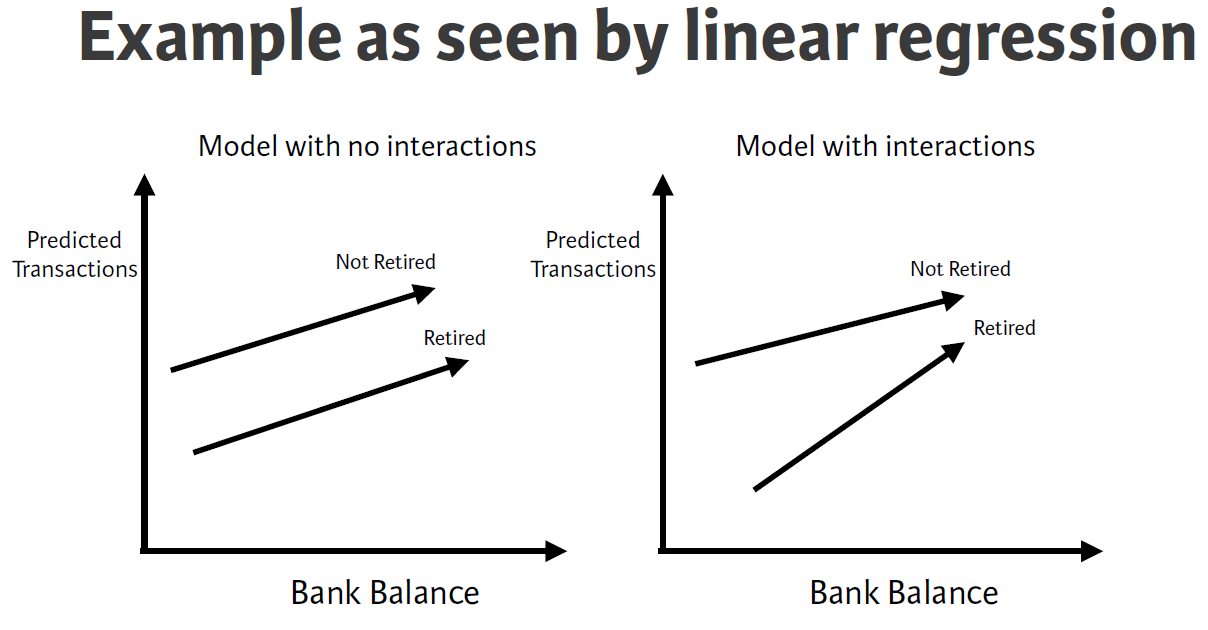

In [3]:
from IPython.display import Image
Image(filename="images/03.png" ,width=500,height=700)

We put current bank balance on the horizontal axis, and the vertical axis is predicted number of transactions. The left graph shows predictions from a model with no interactions. In that model we simply add up the effect of the retirement status, and current bank balance.

The lack of interactions is reflected by both lines in parallel.That's probably unrealistic, but it's an assumption of the linear regression.

The graph on the right show the predictions from a model that allows interactions, and the lines don't need to be parallel 

## Neural Networks

Neural networks are powerful modeling approach that accounts for interactions like this especially well. Deep learning the focus of this course, is the use of especially powerful neural networks.

Because deep learning models accounts for these types of interactions so well, they perform great on most prediction problems you've seen before.

But there ability to capture extremely complex interactions also allow them do amazing things with **text,images,video, audio,source code and almost anything** else you could imagine doing datascience

As a strat to how deeplearning model capture interactions and achives these amazing result, we will modify the diagram you saw  a moment ago.

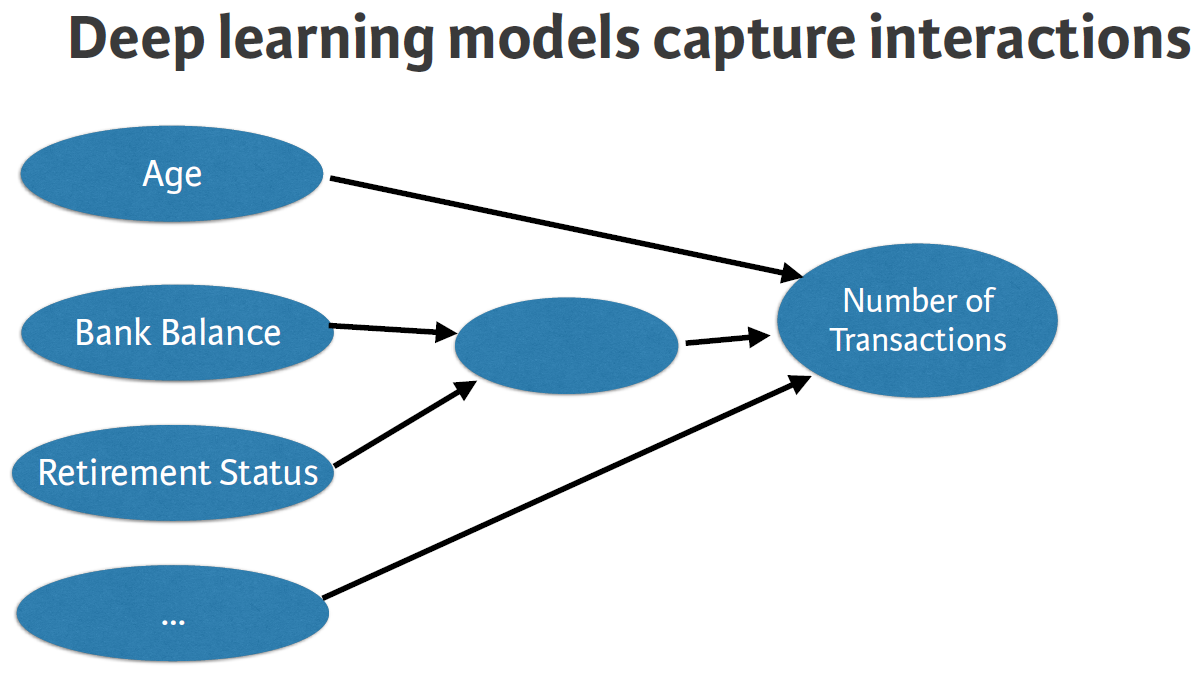

In [4]:
from IPython.display import Image
Image(filename="images/04.png" ,width=500,height=700)

Here there is an interaction between retirement staus and bank balance .Instead of seperately affect the outcome. We calculate a function of these variables that accounts for their interactions, and use that to predict the outcome

Even this graphics oversimplifies reality, where most of things interact with each other in some way, and real neural network models account far more ineractions.

So a diagram for a simple neutal network look like this:


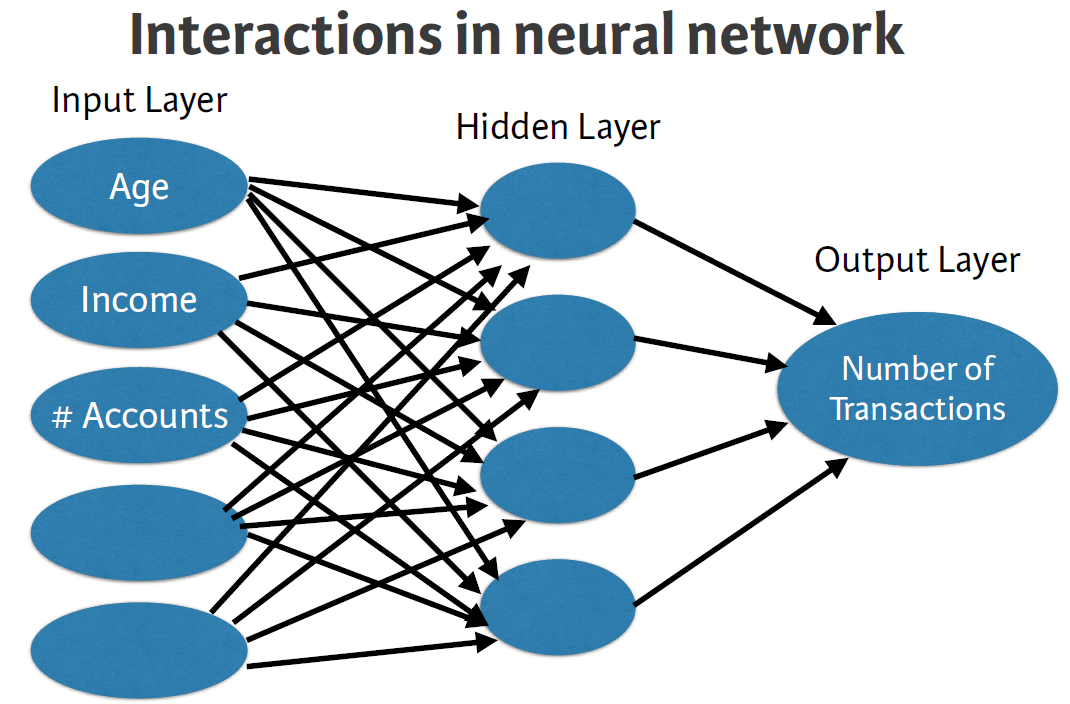

In [5]:
from IPython.display import Image
Image(filename="images/05.png" ,width=500,height=700)

On the far left we have something called an input layers. Thse represent our predictive feature like age or income and so on

On the far right we have the output layer. The predictions from our model, in this case, the predicted no of transactions. 

All layers that are not the input or output layers are called hidden layers. They are called hidden layers because, while inputs and output correspond to be visible things that happened in the world, and they can be stored as data,the values in the hidden layer aren't something we have data about, or anything we observe directly from the world.

Nevertheless, each dot, called a node , in the hidden layer , represent and aggregations of information from our input data, and each node adds to the model's ability to capture interactions. So the more nodes we have , the more interactions we can capture. 

# Forward Propagation

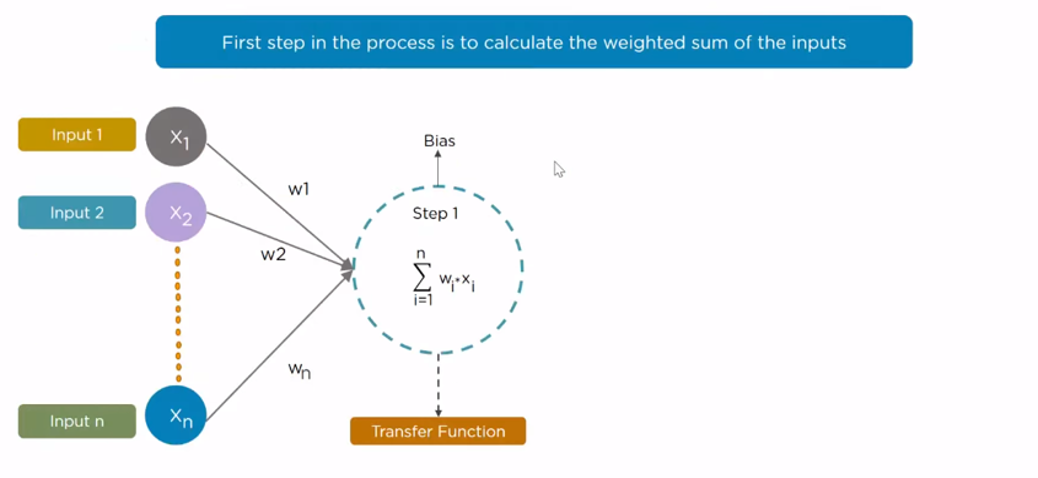

In [38]:
from IPython.display import Image
Image(filename="images/Picture1.png" ,width=700,height=700)

We'll start how neural networks use data to make predictions.This is called the forward propagation algorithm . Let's revisit our example predicting how many transactions a user will make at our bank.

For simplicity, we'll make prediction based on:
- Number of childeren
- Number of existing accounts


This graph shows a customer with two children and three accounts. 

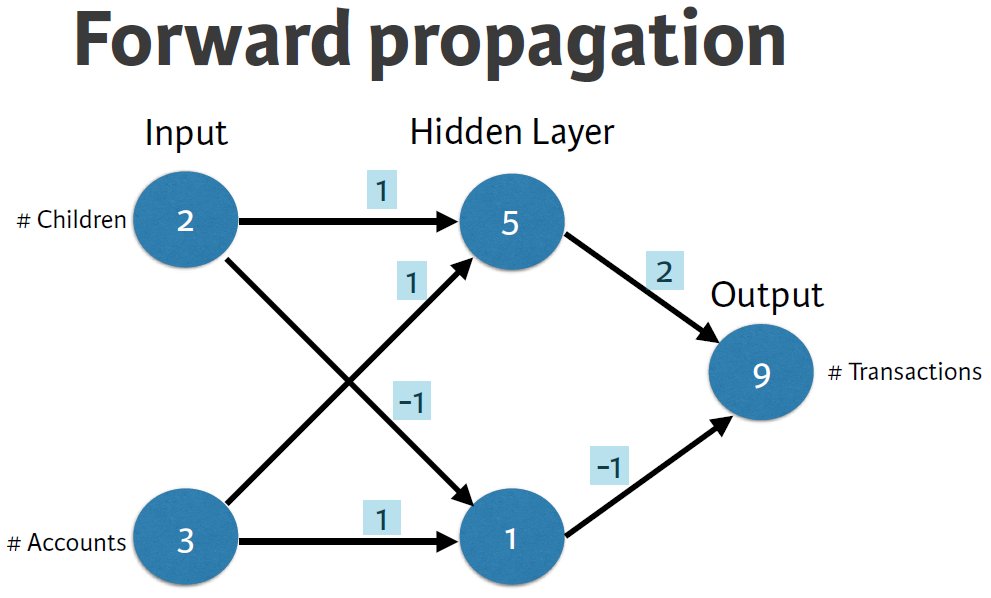

In [11]:
from IPython.display import Image
Image(filename="images/06.png" ,width=500,height=700)

The forward propagation algorithm will pass this information through the network to make a predictions in the output layer. Lines connect the inputs to the hidden layer. Each line has a weight indicating how strongly that input effects the hidden node that the lines ends at. 

These are the first set of weights. We have one weight from the top input into the top node of the hidden layer and one weight from the bottom input to the top node of the hidden layer.

So these weights are the parameters we train or change when when we fit neural netword model to data.

To make predictions for the top node of the hidden layer, we take the value of each node in the input layer , multiply it by weight that ends at that node, and then sum up all the values.


In this case we get (2 times 1)plus(3 times 1), which is 5.

No we do the same to fill in the value of this node on the bottom. That is (2 times -1) plus (3 times 1),which is 1.

Finally we will repeat this process for the next layer, which is the output layer.That is (5 times 2 ) plus (1 times -1). That gives an output or prediction of 9.So we predicted 9 transactions.

We moved from the inputs on the left, to the hidden layer in the middle, and then from the hidden layer to the output on the right.



## Forward Propagation
1. We all use the same multiply then add process.
2. If you are familier with vector algebra or linear algebra. That operation is a dot product.
3. In general, we do forward propagation for one data point at a time.
4. The value in that last layer is the model's predictions for that data point.

## Forward propagation code

In [85]:
import numpy as np

input_data = np.array([2,3])

weights = {
    'node_0' : np.array([1,1]),
    'node_1' : np.array([-1,1]),
    'output' : np.array([2,-1])
}

node_0_value = (input_data * weights['node_0']).sum()
node_1_value = (input_data * weights['node_1']).sum()

hidden_layer_values = np.array([node_0_value, node_1_value])

print(hidden_layer_values)

output = (hidden_layer_values * weights['output']).sum()

print(output)

[5 1]
9


# Activation Functions

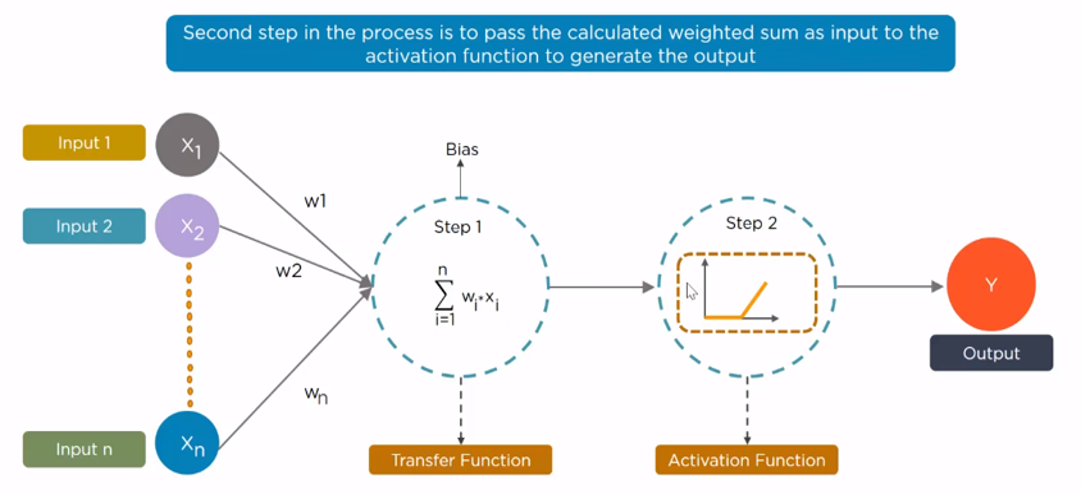

In [40]:
from IPython.display import Image
Image(filename="images/Picture2.png" ,width=500,height=700)

By creating  **multiply-add-process** is only half the story of hidden layer. For neural network to achive their maximum predictive power, we must apply something called an **activation function** in hidden layer.

An activation function allows the model to capture **non-linearities**

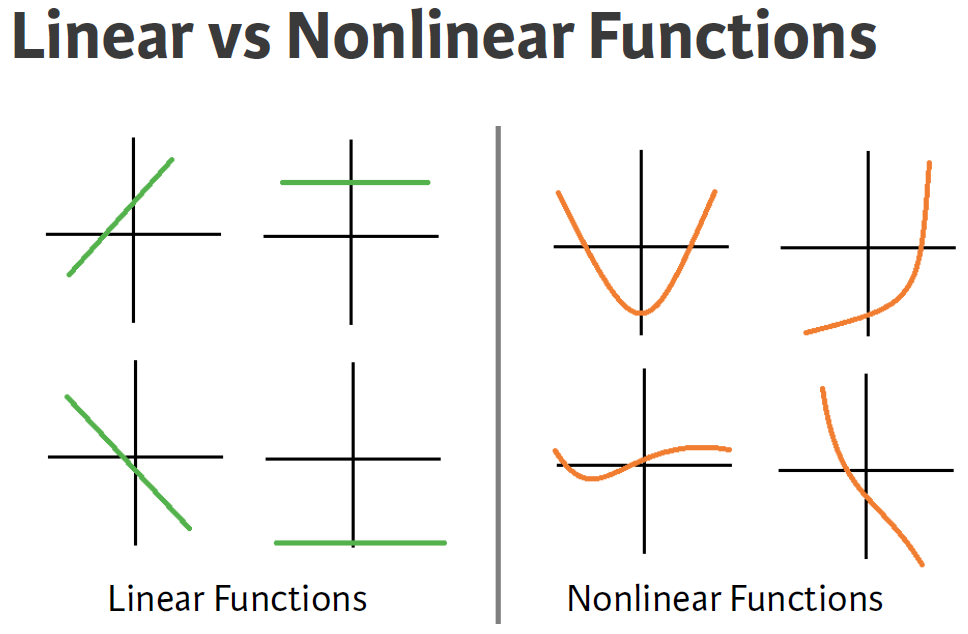

In [15]:
from IPython.display import Image
Image(filename="images/07.png" ,width=500,height=700)

Non linearities as shown on the right here,captures patterns like how going from no children or from one child to two children may impact your banking transactions differently then going three children to 4 children.

We have examples of linear functions, straingth lines on the **left** and non-linear functions on the **right**

If the relationship in the data aren't straight-lines relationships, we need **activation function** that capture non-linearites

### Activation Functions

An activation function is something applied to the value comming into the node,Which then transform it into the value stored in that node or node output.

Let's improve  our neural network model. 

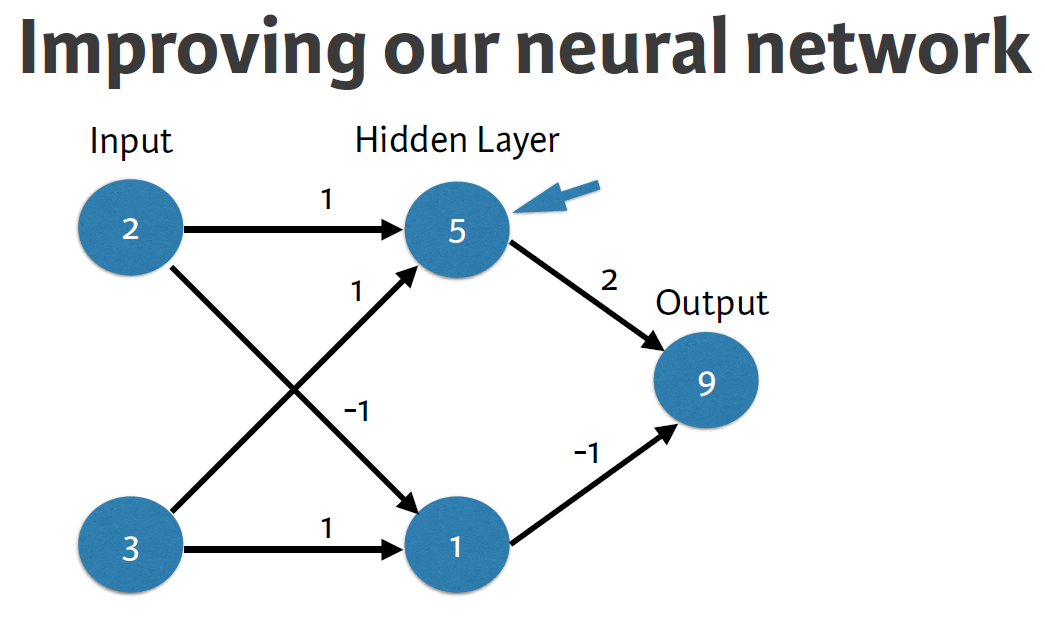

In [16]:
from IPython.display import Image
Image(filename="images/08.png" ,width=500,height=700)

The top hidden node had  a value 5 . For long time **s-shape function called tanh** was a popular activation function

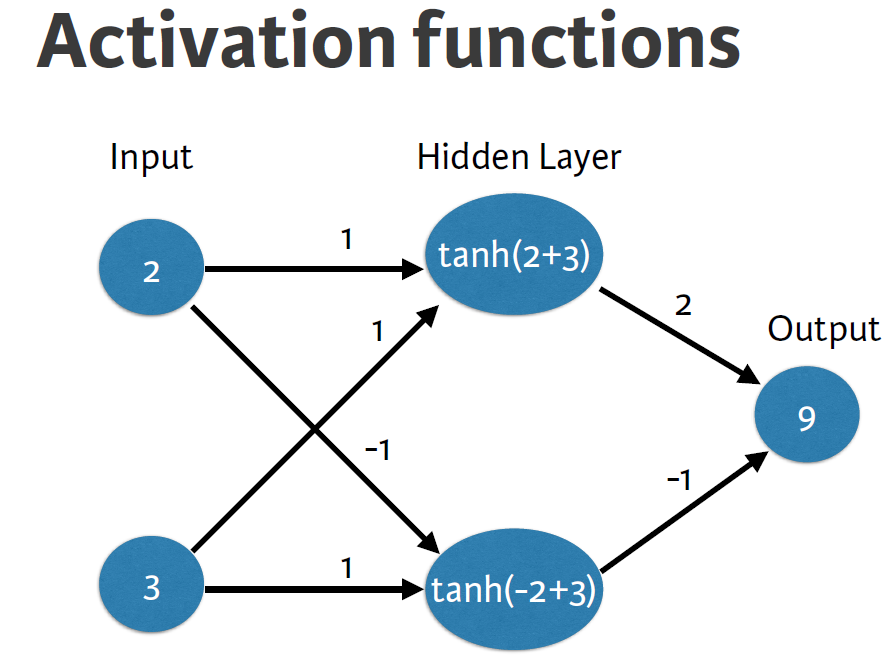

In [17]:
from IPython.display import Image
Image(filename="images/09.png" ,width=500,height=700)

If we use the tanh activation function.This value will be tanh(5), which is very close to 1. 

Today, the standard in both industry and research applications is something called the **ReLU or Rectified Linear** activation function is used.

That's dipicted here.

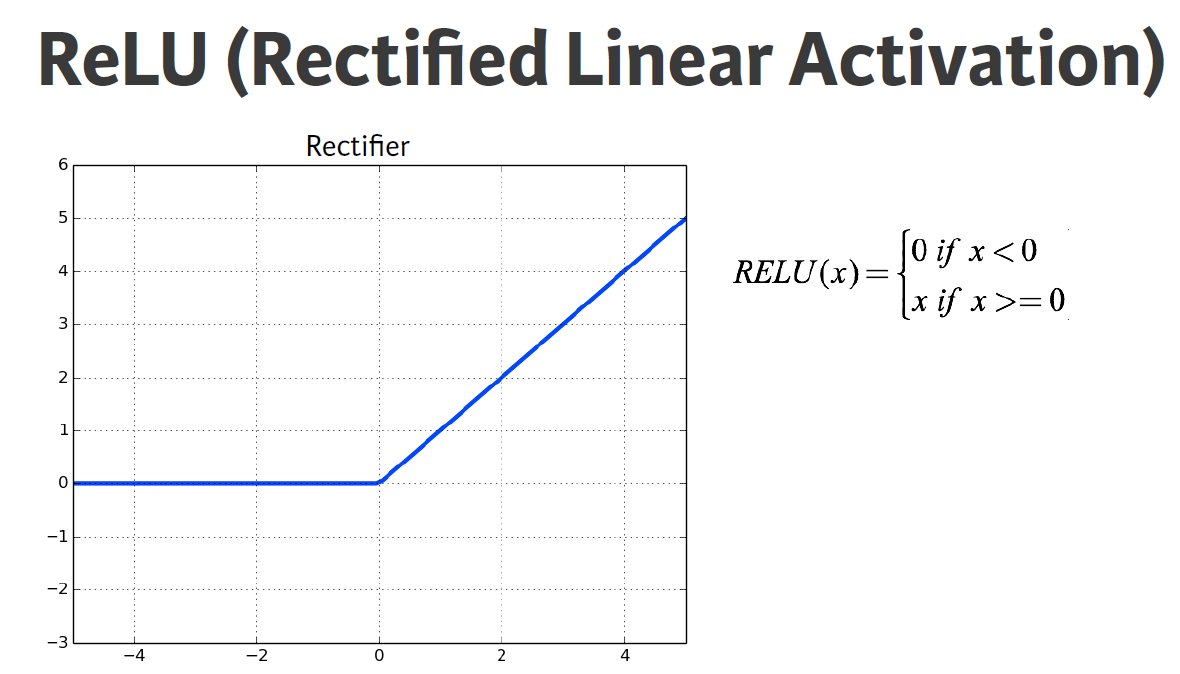

In [19]:
from IPython.display import Image
Image(filename="images/10.png" ,width=500,height=700)

It has two linear pieces, its surprisingly powerful when composed together through multiple successive hidden layers,which we will see soon

## Activation function code 

In [24]:
import numpy as np

input_data = np.array([2,3])

weights = {
    'node_0' : np.array([1,1]),
    'node_1' : np.array([-1,1]),
    'output' : np.array([2,-1])
}

node_0_input = (input_data * weights['node_0']).sum()
node_0_output = np.tanh(node_0_input)  #converting input to output

node_1_input = (input_data * weights['node_1']).sum()
node_1_output = np.tanh(node_1_input)  #converting input to output

hidden_layer_values = np.array([node_0_output, node_1_output])

print(hidden_layer_values)

output = (hidden_layer_values * weights['output']).sum()

print(output)


[0.9999092  0.76159416]
1.2382242525694254


This gives us a predictions 1.2 transactions.

## The Rectified Linear Activation Function

An "activation function" is a function applied at each node. It converts the node's input into some output.

The rectified linear activation function **(called ReLU)** has been shown to lead to **very high-performance networks**. This function takes a single number as an input, returning `0 if the input is negative`, and `the input if the input is positive`.

Here are some examples:

relu(3) = 3 

relu(-3) = 0 

In [26]:
def relu(input):
    '''Define your relu activation function here'''
    # Calculate the value for the output of the relu function: output
    output = max(0, input)
    
    # Return the value just calculated
    return(output)

In [27]:
# Calculate node 0 value: node_0_output

import numpy as np

input_data = np.array([3,5])

weights = {
    'node_0' : np.array([2,4]),
    'node_1' : np.array([4,-5]),
    'output' : np.array([2,7])
}

node_0_input = (input_data * weights['node_0']).sum()
node_0_output = relu(node_0_input)

node_1_input = (input_data * weights['node_1']).sum()
node_1_output = relu(node_1_input)

hidden_layer_outputs = np.array([node_0_output, node_1_output])

print(hidden_layer_outputs)

# Calculate model output
input_to_final_layer = (hidden_layer_outputs * weights['output']).sum()
model_output = relu(input_to_final_layer)

print(model_output)

[26  0]
52


# Deeper networks

The difference between modern deep learning and the historical neural networks that didn't deliver these amazing results is the use of model with not just one hidden layer, but with many successive hidden layers. 

We forward propagate through these successive layers in a similar way to what you saw for a single hidden layer.

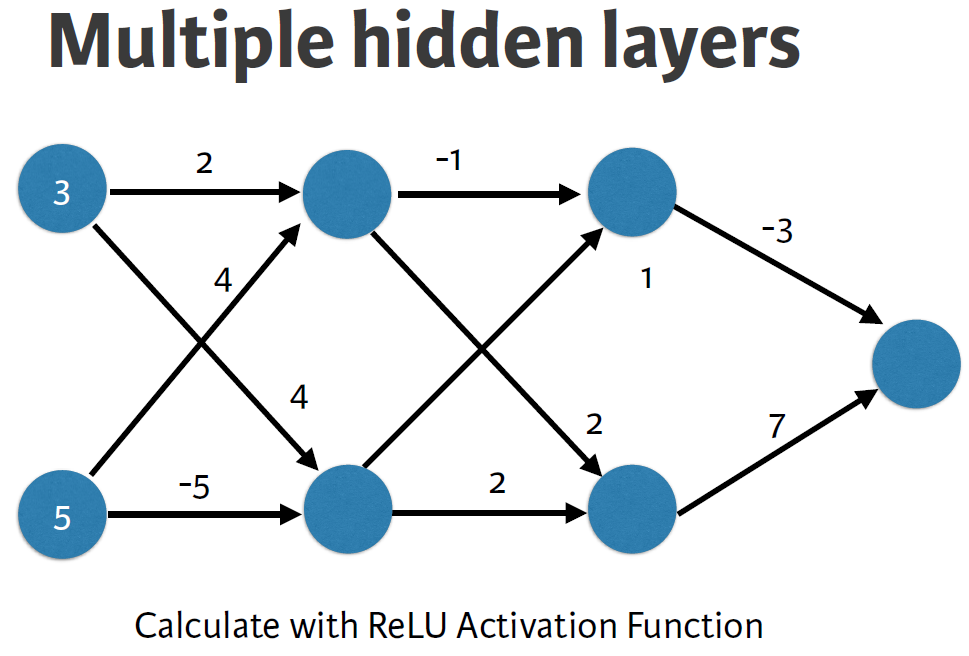

In [33]:
from IPython.display import Image
Image(filename="images/11.png" ,width=500,height=700)

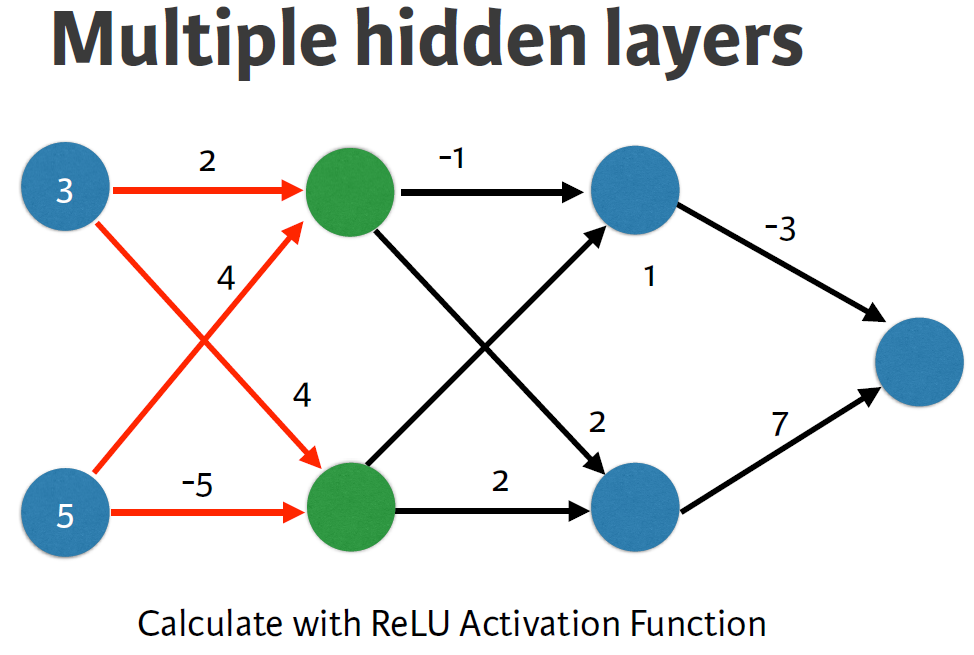

In [34]:
from IPython.display import Image
Image(filename="images/12.png" ,width=500,height=700)

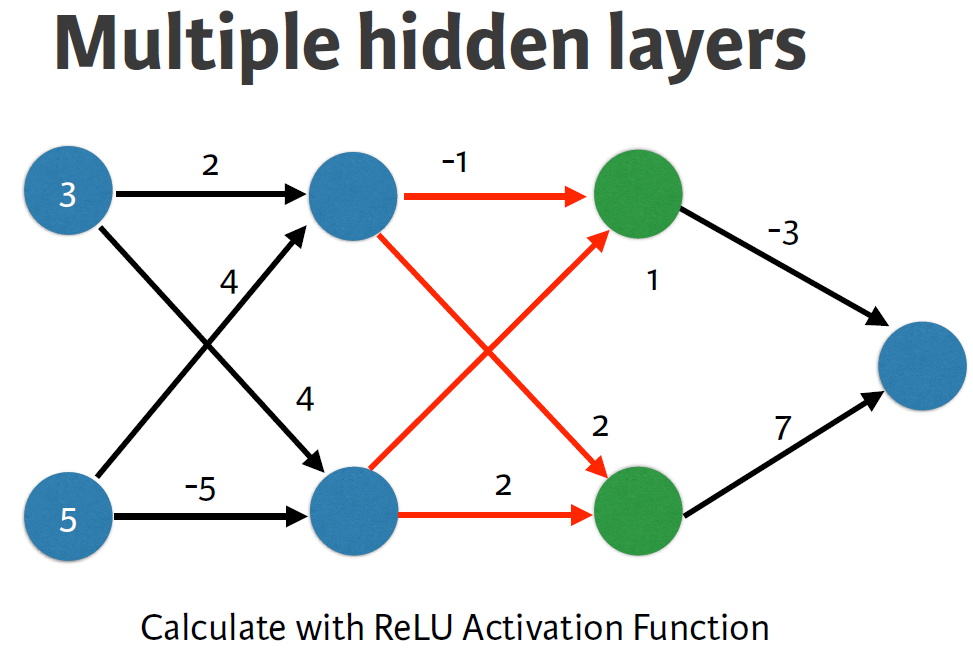

In [35]:
from IPython.display import Image
Image(filename="images/13.png" ,width=500,height=700)

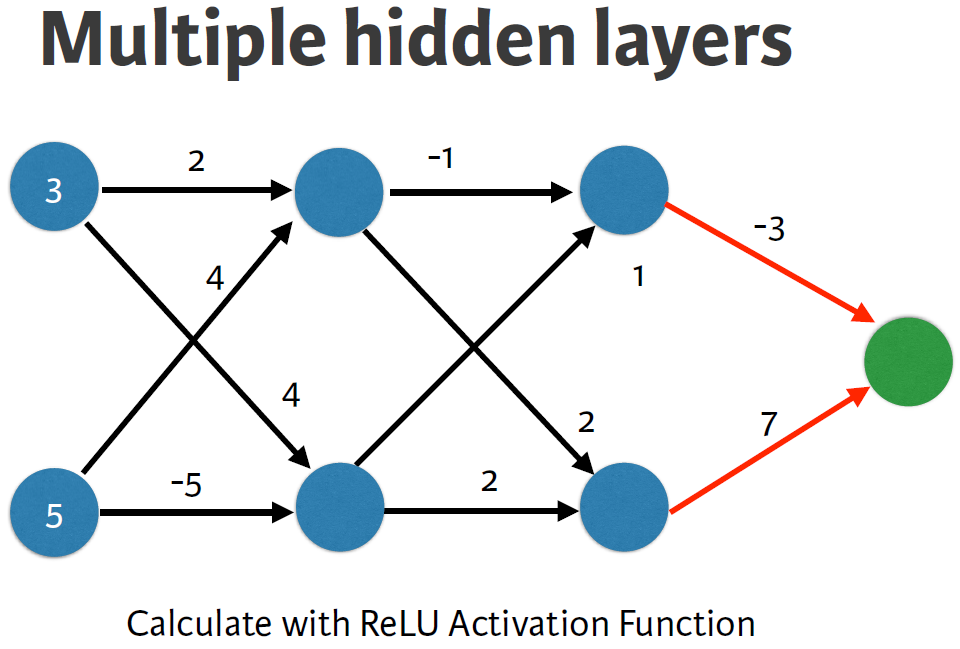

In [36]:
from IPython.display import Image
Image(filename="images/14.png" ,width=500,height=700)

Here is the network with two hidden layer.We first fill in the value for hidden layer one as a function of the inputs. Then apply the activation function to fill in the values in these nodes . Then uses values from the first hidden layer to the fill in the second hidden layer. Then we make prediction based on the output of the hidden layer two.

In practice, its becoming common to have neural networks that have many, many layers , five layers, 10 layers . A few years 15 layers was the state of art but this can scale quite naturally  to even a thousand layers

You use the same forward propagation process, but you apply the iterative process more times. 

Let's walk through the first step of that . Assume all layers here uses the ReLU activation function.

We start by filling in the top node of the first hidden layer. That will use these two weights. The top weights contributes 3 times 2 , or 6. The bottom weight contribute 20.

The ReLu activation function on a positive number just returns that number .so we get 26.

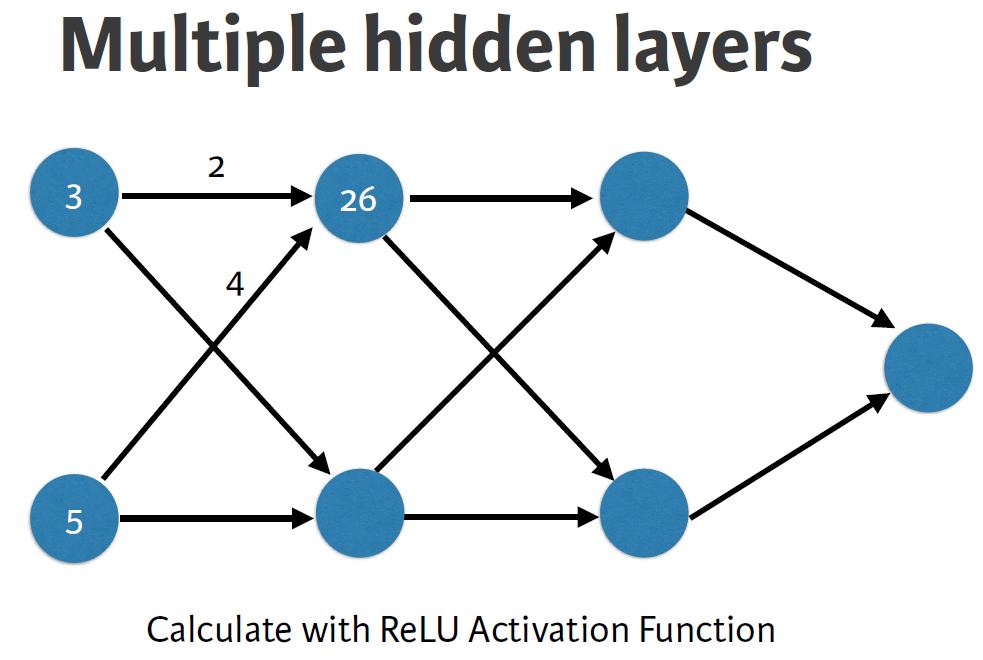

In [37]:
from IPython.display import Image
Image(filename="images/15.png" ,width=500,height=700)

Now let's do the bottom node of that first hidden layer .We use the two nodes. Using the same process we get (4 times 3 =12 )plus (5 times -5 = -25) .so the input of the bottom note is 12 - 25 = -13.
Recall that when we apply ReLu to a negative number we get 0. so this node is zero.

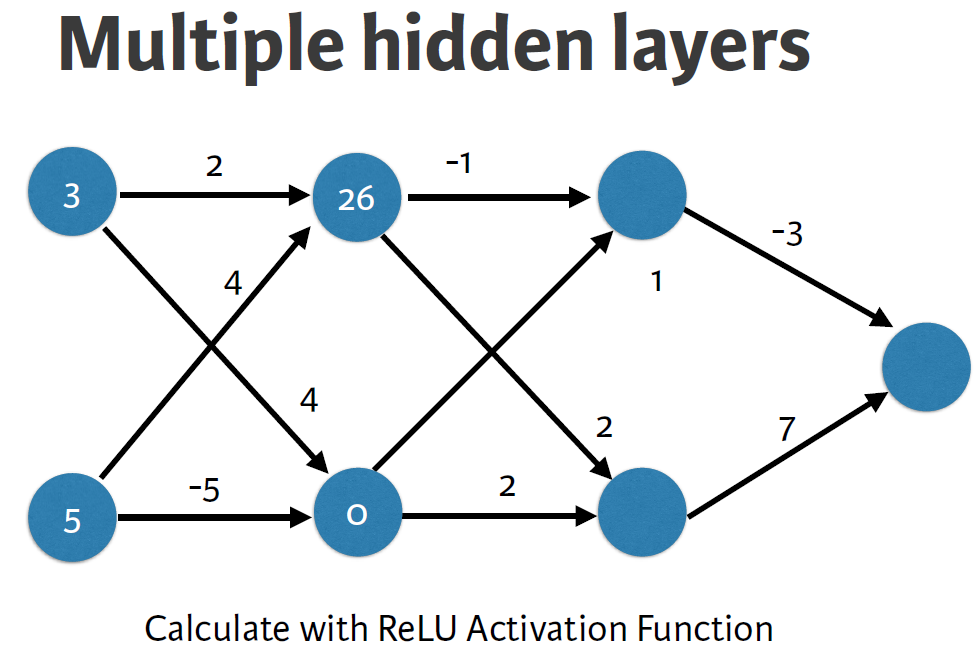

In [38]:
from IPython.display import Image
Image(filename="images/16.png" ,width=500,height=700)

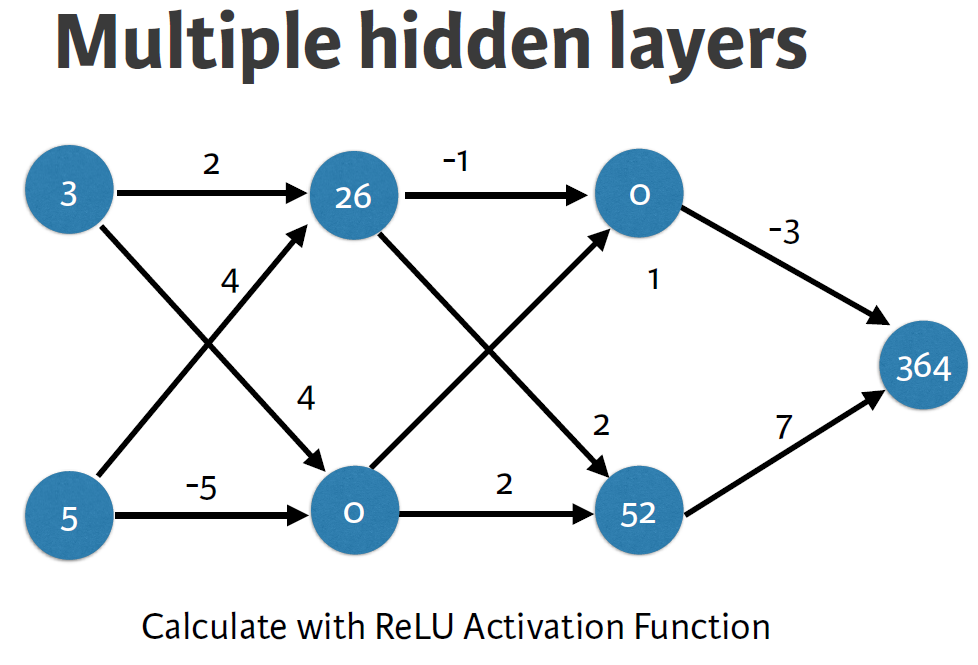

In [39]:
from IPython.display import Image
Image(filename="images/17.png" ,width=500,height=700)

## Representation Learning

1. Deep learning internally build up representations of the patterns in the data that are useful for making predictions. and they find increasingly complex pattern as we go through successive hidden layers of the network.

2. In this way neural network partially replace the need for feature engineering or manually creating better predictive features.

3. Deep learning is also sometimes called representation learning , because subsequent layers build increasingly sophisticated representations of the raw data, until we get to a stage where we can make predictions.

This is easiest to understand from an application to images, which we will se latter in the course. Even you haven't worked on images , you may find it useful to think through this example heuristically.


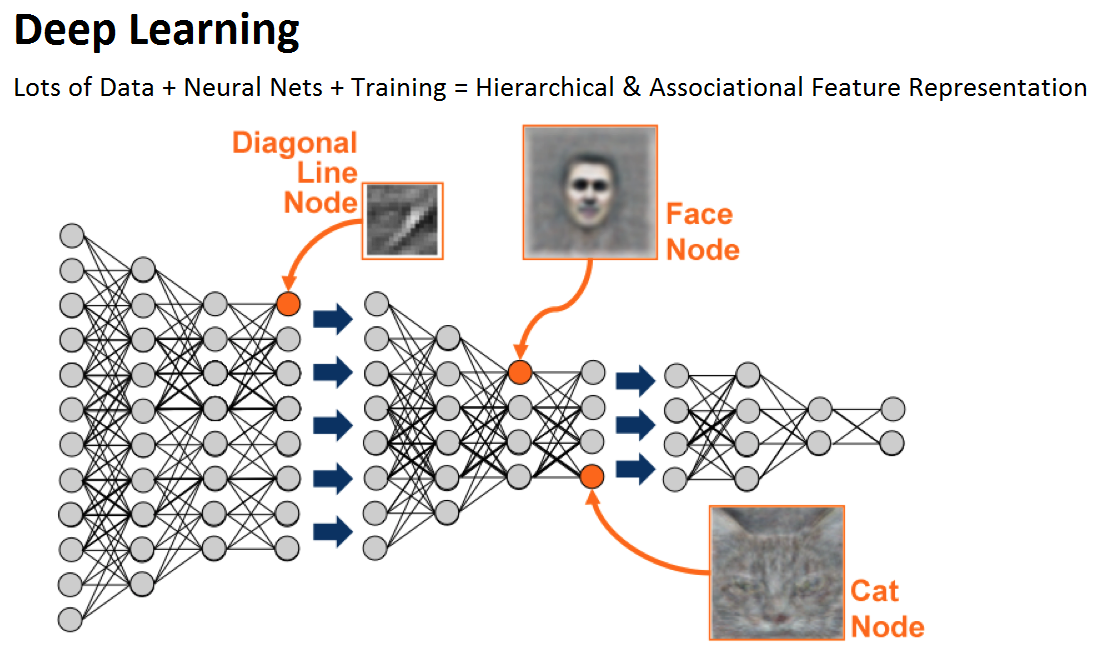

In [52]:
from IPython.display import Image
Image(filename="images/18.png" ,width=700,height=700)

when the neural network tries to classify an image, the first hidden layer build up a pattern or interactions that are conceptually simple . A simple interaction would looked at groups of nearby pixels and find patterns like diagonal lines, horizontal lines,vertical lines,blurry areas etc. Once the network has identified the diagonal lines and horizontal lines and vertical lines , subsequent layers combines that information to find patterns, like big squares. A later layer might put together the location of squares and other geometric shapes to identify a checker board pattern , a face, a car,or whatever in the image .

The cool thing about deep learning is that the modeler doesn't need to specify thoes interactions. we never tells the model to look for diagonal lines . 

Instead , when you train the model,The neural networks gets the weights that find the releveant patterns to make better predictions.

Working with images may still seem abstract , but this idea of finding increasingly complex or abstract patterns is a recurring theme when people talk about deep learning 

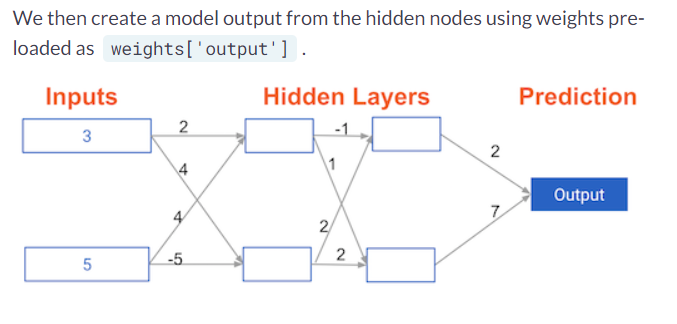

In [28]:
from IPython.display import Image
Image(filename="images/19.png" ,width=500,height=700)

In [59]:
import numpy as np

def predict_with_network(input_data):
    # Calculate node 0 in the first hidden layer
    node_0_0_input = (input_data * weights['node_0_0']).sum()
    node_0_0_output = relu(node_0_0_input)

    # Calculate node 1 in the first hidden layer
    node_0_1_input = (input_data * weights['node_0_1']).sum()
    node_0_1_output = relu(node_0_1_input)

    # Put node values into array: hidden_0_outputs
    hidden_0_outputs = np.array([node_0_0_output, node_0_1_output])

    # Calculate node 0 in the second hidden layer
    node_1_0_input = (hidden_0_outputs * weights['node_1_0']).sum()
    node_1_0_output = relu(node_1_0_input)

    # Calculate node 1 in the second hidden layer
    node_1_1_input = (hidden_0_outputs * weights['node_1_1']).sum()
    node_1_1_output = relu(node_1_1_input)

    # Put node values into array: hidden_1_outputs
    hidden_1_outputs = np.array([node_1_0_output, node_1_1_output])
    
    # Calculate output here: model_output
    model_output = (hidden_1_outputs * weights['output']).sum()
    
    # Return model_output
    return(model_output)


input_data= np.array([3,5])
#weights
weights = {
    'node_0_0' : np.array([2,4]),
    'node_0_1' : np.array([4,-5]),
    'node_1_0' : np.array([-1,-2]),
    'node_1_1' : np.array([1,2]),
    'output' : np.array([2,7])
}

output = predict_with_network(input_data)
print(output)

182


## How are the weights that determine the features/interactions in Neural Networks created?

The model training process sets them to optimize predictive accuracy.

#### Which layers of a model capture more complex or "higher level" interactions?

The last layers capture the most complex interactions

# The need for Optimization

You have seen the forward-propagation algorithm that neural network use to make predictons. However, the mere fact that a model has the structure of a neural network does not gaurantee that it will make good predictions.To see the importance of the model weights. we'll go back to a network you saw earlier 

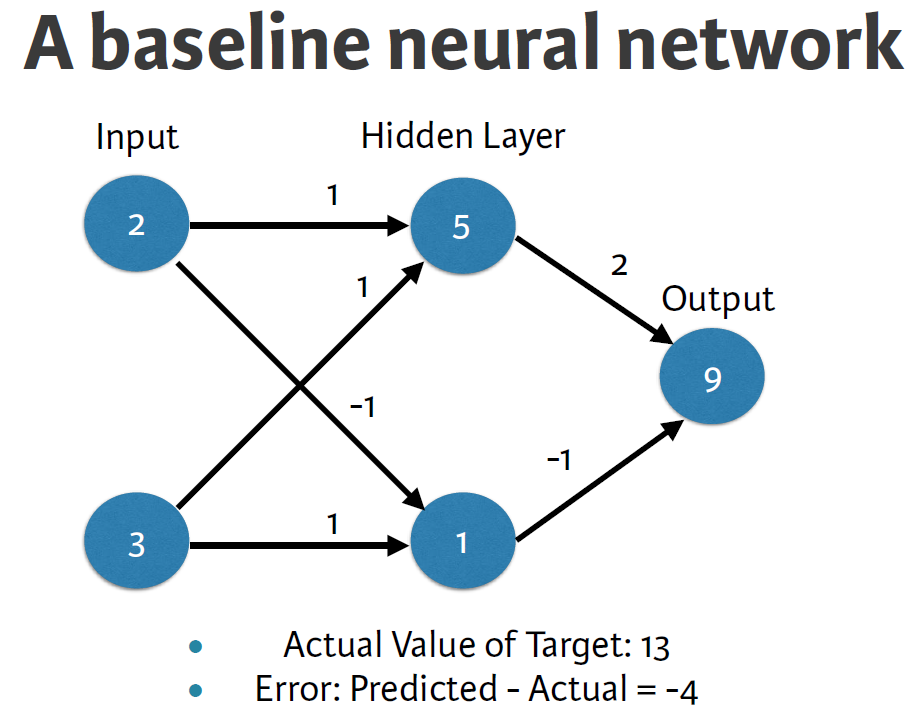

In [50]:
from IPython.display import Image
Image(filename="images/20.png" ,width=500,height=700)

We will take a simple example but we won't use the activation function in this example.Or you might thing of an **activation function** that return the **input** sometimes called the **identity function**. We have values 2 and 3 for the inputs, and the true value of the target is 13.So the closer our predictions is to 13 ,the more acurate the model is for this datapoint.

We use forward propagation to fill the values of hidden layer.That gives us hidden noden value of 5 and 1. Continuing forward propagation. we use those hidden node values to make a prediction of 9 

Since the true target value is 13, our error = 9 - 13 = -4 .

Changing any weight will change our predictions . Lets see what happens when we change the two weights from the hidden layer to the output layer. In this case we make the top weight 3 and bottom weight -2.

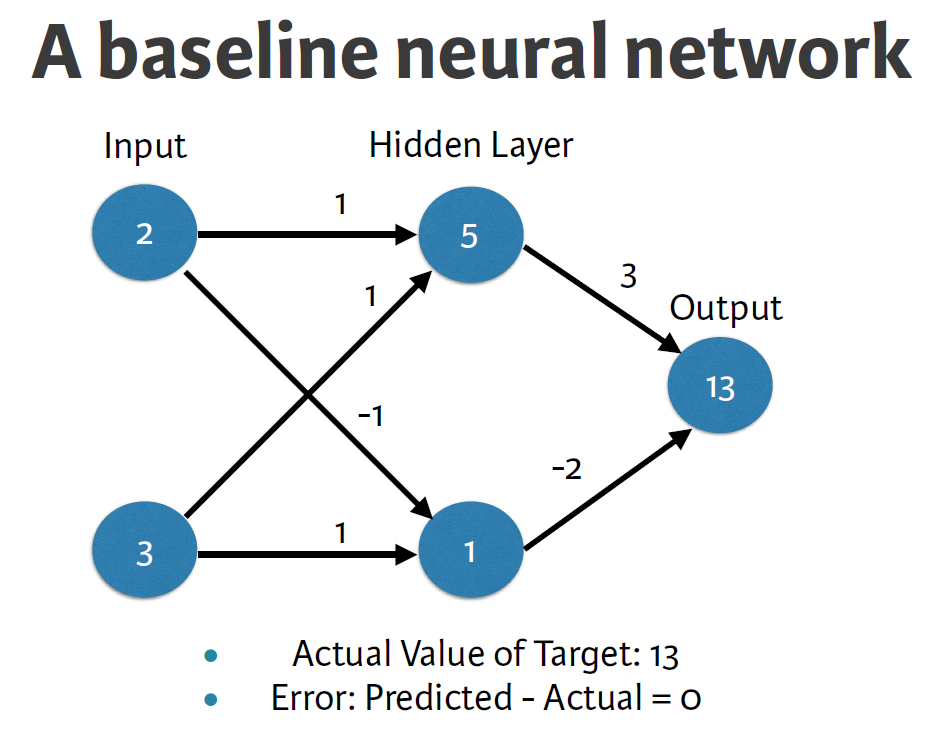

In [54]:
from IPython.display import Image
Image(filename="images/21.png" ,width=500,height=700)

Now the forward propagation gives us the prediction of 13.That is exactly the value we wanted to predict.So this change in weight improved the model for this data point. 

## Prediction with multiple points

1. Making accurate prediction gets harder with multiple data points.
2. At any set of weights, we have many values of the error, 
3. corresponding to the many points we make prediction for.

We use something call `loss function`

# Loss Function

We use loss function to:
1. aggregate all the errors in prediction from many data point  into a single number, 
2. measure of the model's predictive performance

## For example, a common loss function for regression task is mean-squared error.

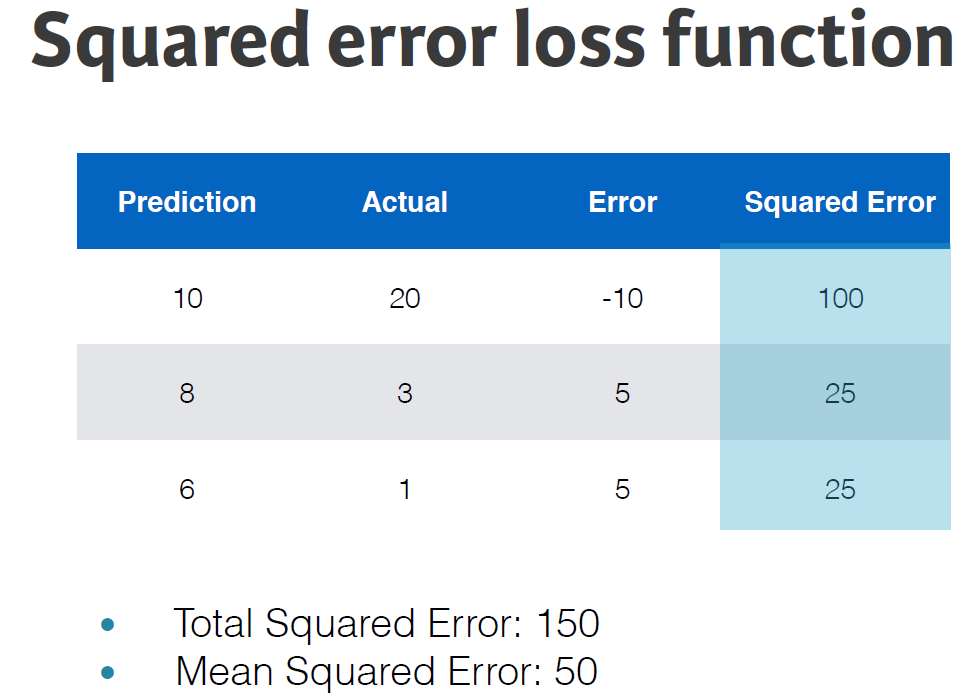

In [19]:
from IPython.display import Image
Image(filename="images/22.png" ,width=500,height=700)

You square each error, and take the average of that as a measure of model quality. 

The loss function aggregates all of the errors into a single score.

For illustration, consider a model with only two weights , we could plot the model performance for each set of weights like this

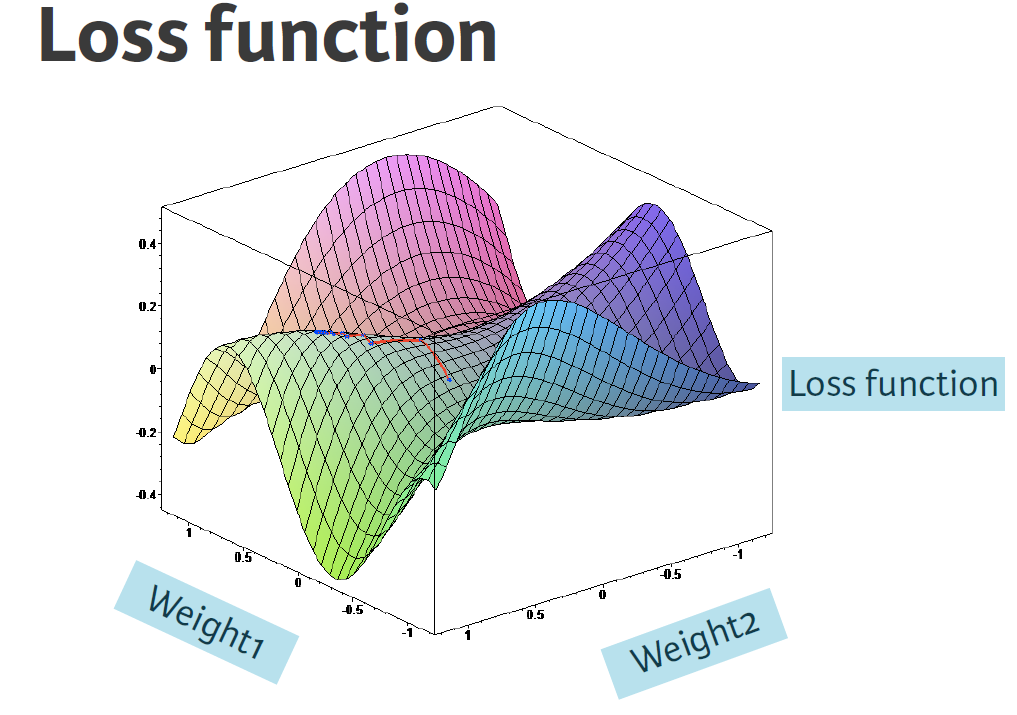

In [60]:
from IPython.display import Image
Image(filename="images/23.png" ,width=500,height=700)

The values of the weight are ploted on the x andy axis, and the loss function is on the vertical or z-axis.

- Lower values mean a better model, 
- **Goal** is to find the weights giving the lowest value for the loss function.

We do this with an algorithm called **Gradient decent**.

# Gradient descent

An anlaogy will be helpful. 
1. Imagine you are on a hill
2. Want to find the lowest point 
3. Feel the ground to see how it slopes, and 
4. take a small steps downhill This may give you the improvement but not the lowest point yet.
5. So you repeat this process untill it is uphill in every direction.

This is how roughly Gradient decent works.



# Gradient descent steps

1. The steps are: start at a random point, 
2. Untill you are somewhere flat:
    - find a slope 
    - take a small step downhill

    

### Optimizing a model with a single weight

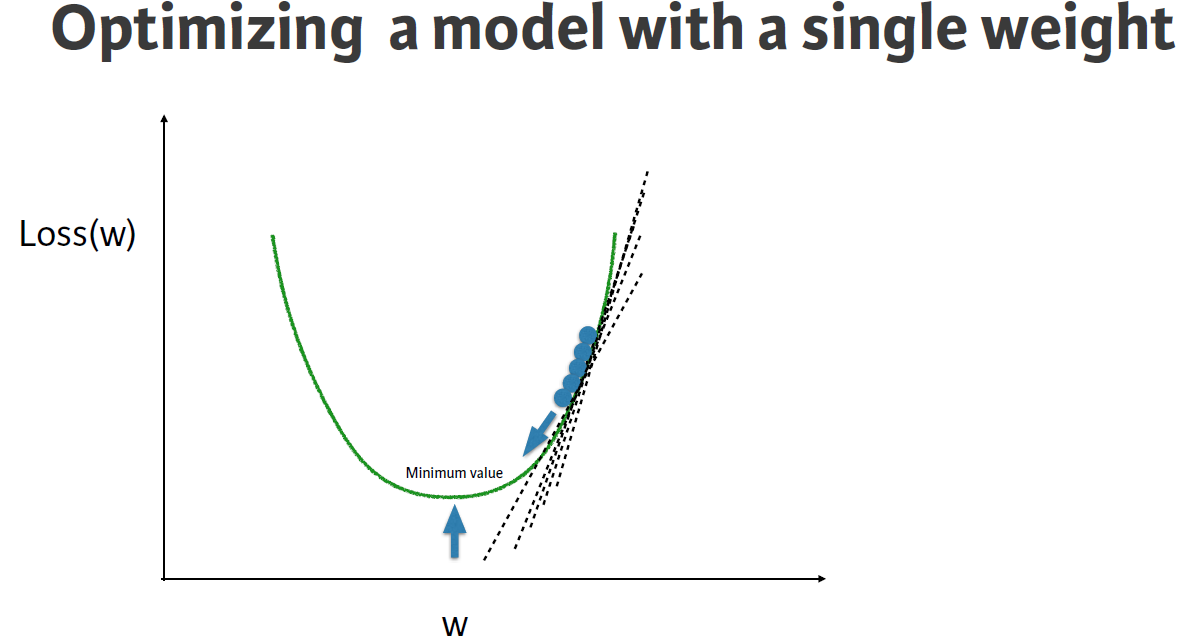

In [63]:
from IPython.display import Image
Image(filename="images/24.png" ,width=500,height=700)

We have a curve showing the loss function on the vertical axis at different values of weight on the horizontal axis. we are looking for the low point in this curve, because that means our model is as accurate as possible . We have drawn this tangent line to the curve point . The slope of this tanget line captures the slope of the loss function at our current weight. That slopes corresponds to something called derivates from calculus.We use this slope to decide what direction we step. In this case the slope is positive. So if you want to go downhill, we go in the direction opposite the slope ,towards lower numbers.If we repeatedly take small steps oppsite the slope. We recalculate the slope each time , we eventually get the minimum value. 

# Gradient decent / slope

With gradient decent you repeatedly find a **slope** capturing how your **loss function** changes as a **weight** changes.You then made a small change to the weight to get to a lower point, and you repeated this until you could'nt go dowhill any more.

- If the slope is positive, 
    - going opposite the slopes means moving to lower numbers 
    - Substract the slope from the current value achive this.
    - to big a step might lead to us astray.
    - So instead of directly substracting the slope. we multiple the slope by a small number , called **learning rate** and  we change the weight by subtracting the product of learning rate * slope.
    - Learning rate are frequently around .01 
    

## Solution : learning rate

### - update each weight by subtracting learningrate * slope
### - Learning rates are frequently around 0.01

This ensure we take samll steps . so we reliably move towards the optimal weight.

## How do we find the relevant slope for each weight we need to update?

Working this out for yourself involves calculus, especially the application of the chain rule. Don't worry if you don't remember or don't know calculus. We'll explain the basic concepts here, and Keras and TensorFlow do the calculus for us.

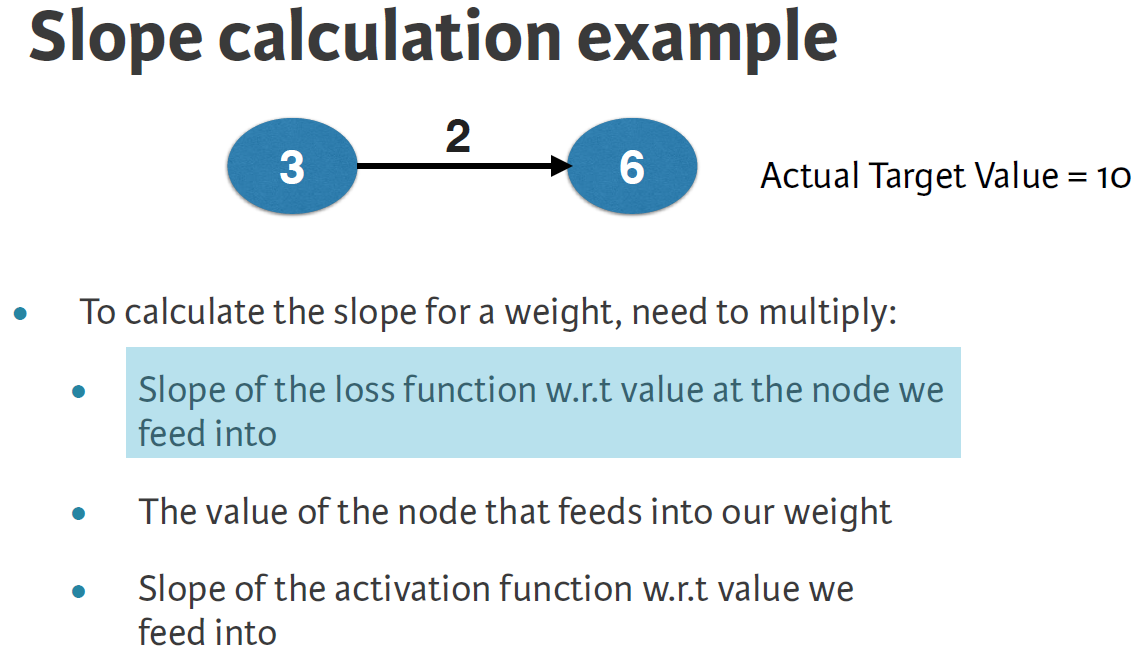

In [77]:
from IPython.display import Image
Image(filename="images/28.png" ,width=500,height=700)

## First: Slope of the loss function w.r.t value at the node we feed into

Lets start with slope of the loss function w.r.t the value of the node our weights feeds into. In this case, that node is the model's predictions .If you work through some calculus , you will find that the slope of the mean-squared loss function w.r.t predictions is **2times(predicted value - actual value)**. which is **2 times the error**.

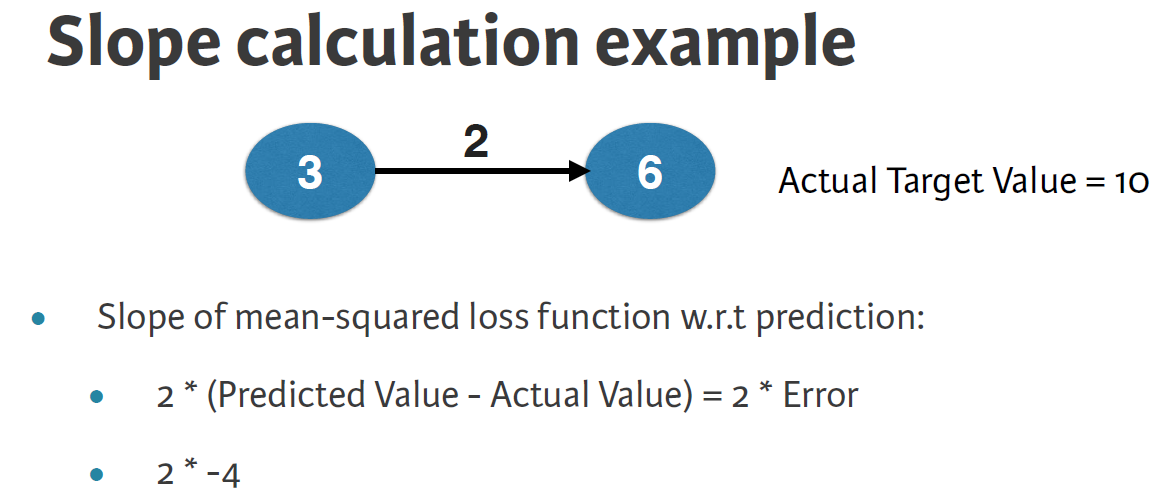

In [78]:
from IPython.display import Image
Image(filename="images/29.png" ,width=500,height=700)

## Second : The value of the node that feed into our weight

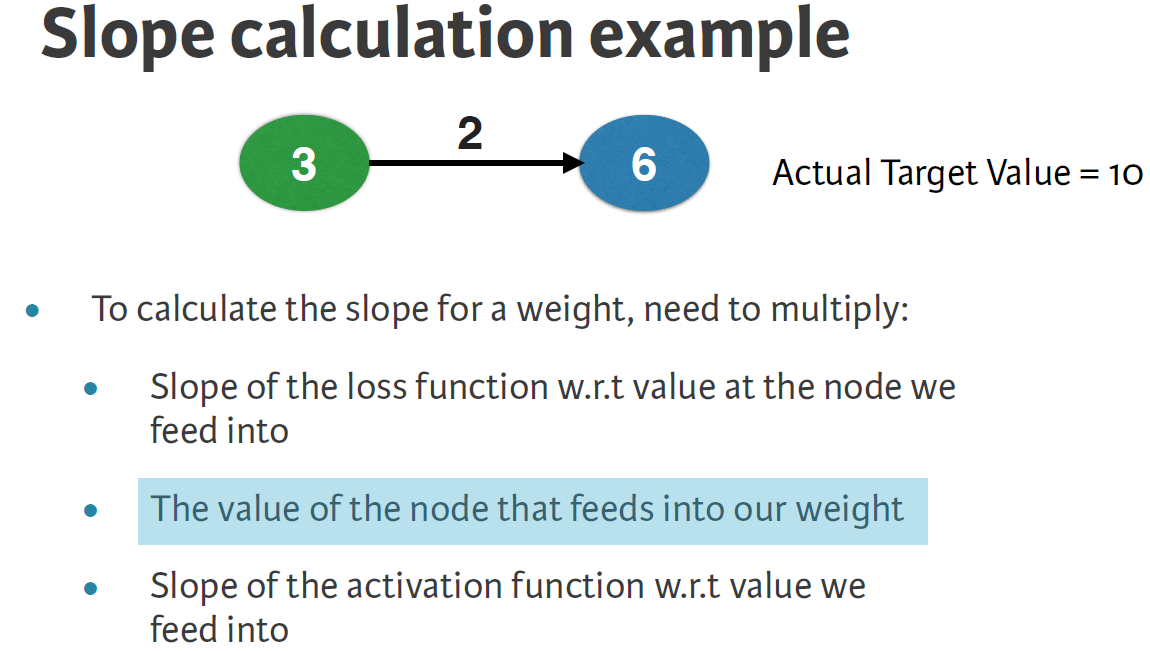

In [80]:
from IPython.display import Image
Image(filename="images/30.png" ,width=500,height=700)

The second thing we multiply is the value at the node we are feeding from . Here thats 3 

## Finally: Slope of the activation function at the value we feed into

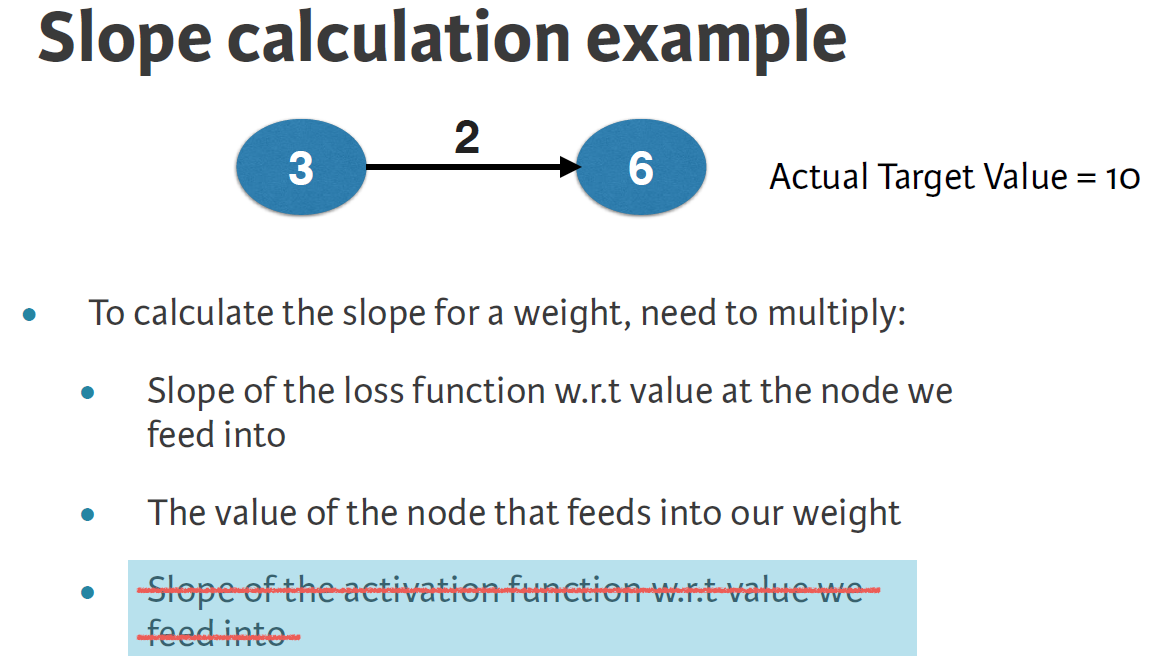

In [82]:
from IPython.display import Image
Image(filename="images/31.png" ,width=500,height=700)

Finally Slope of the activation function at the value we feed into. Since we dont have a activation function here , we can leave that out.

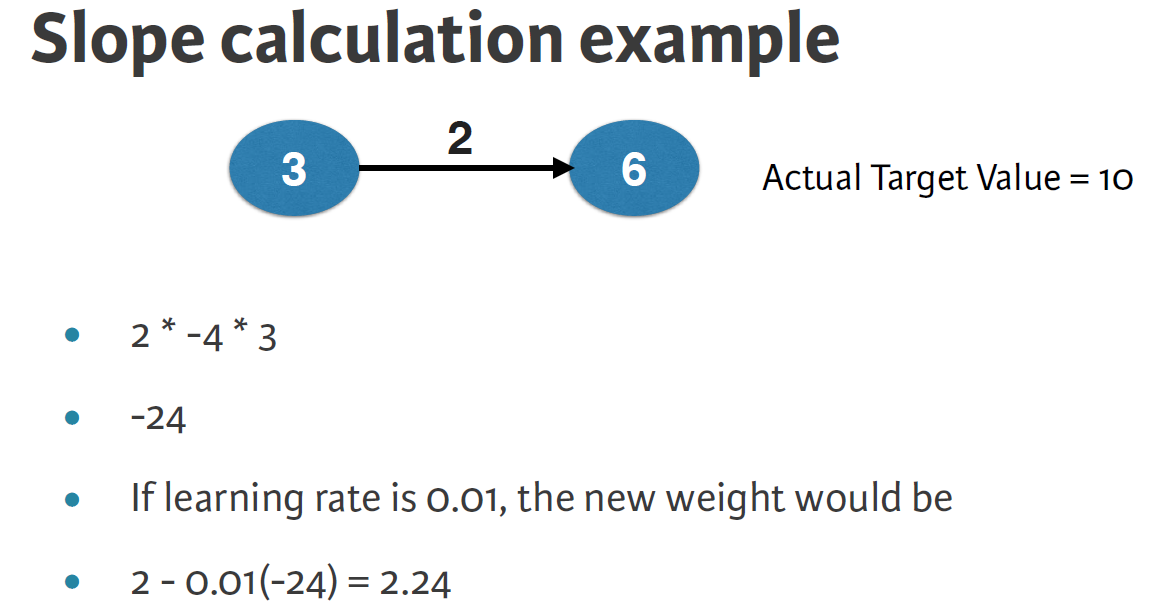

In [83]:
from IPython.display import Image
Image(filename="images/32.png" ,width=500,height=700)

so our final result for the slope of loss if we graphed it against this is (2 times -4) times 3 = -24. We would now improve this weight by subtracting the learning rate times the slope (-24). if the learning rate is 0.01 we will update this weight to be 2 - 0.01 * (-24) = 2.24. That gives us a better model.and we continue improving we repeated the process. 

### For multiple weights

for multiple weights feeding to the output , we repeat this calculation seperately for each weight.Then we update both weight simultaneously using their respective derivatives.

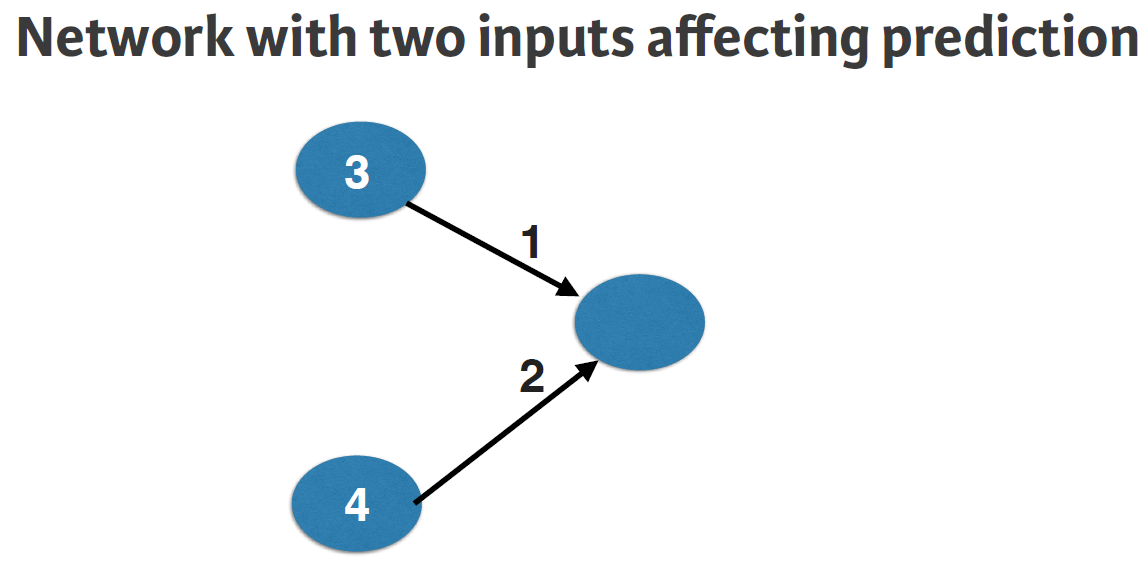

In [84]:
from IPython.display import Image
Image(filename="images/33.png" ,width=500,height=700)

Here is a network with two weights going directly to an output, and again with no activation functions .consider the target is 6

# Code to calculate slopes and update weight.

In [61]:
import numpy as np

weights = np.array([1, 2])

input_data = np.array([3, 4])

target = 6

learning_rate = 0.01

preds = (weights * input_data).sum()

error = preds - target

print(error)

gradient = 2 * input_data * error

print(gradient)
# Incidentally, the mathematical term for this array of slopes is a "gradient", 
# and this where the name gradient decent comes

weights_updated = weights - learning_rate * gradient
print(weights_updated)


preds_updated = (weights_updated * input_data).sum()

error_updated = preds_updated - target

print(error_updated)

5
[30 40]
[0.7 1.6]
2.5


# Back Propagation

You have used gradient decent to optimize weights in a simple model. Now we'll add a techniques call "Back propagations" to calculate the slopes you need to optimize more complex deep learning models  

Just as forward propagation sends input data through the hidden layers and into the output layer. 

Back Propagation takes the error from the output layer and propagates it backwards through the hidden layers , towards the input layers. 


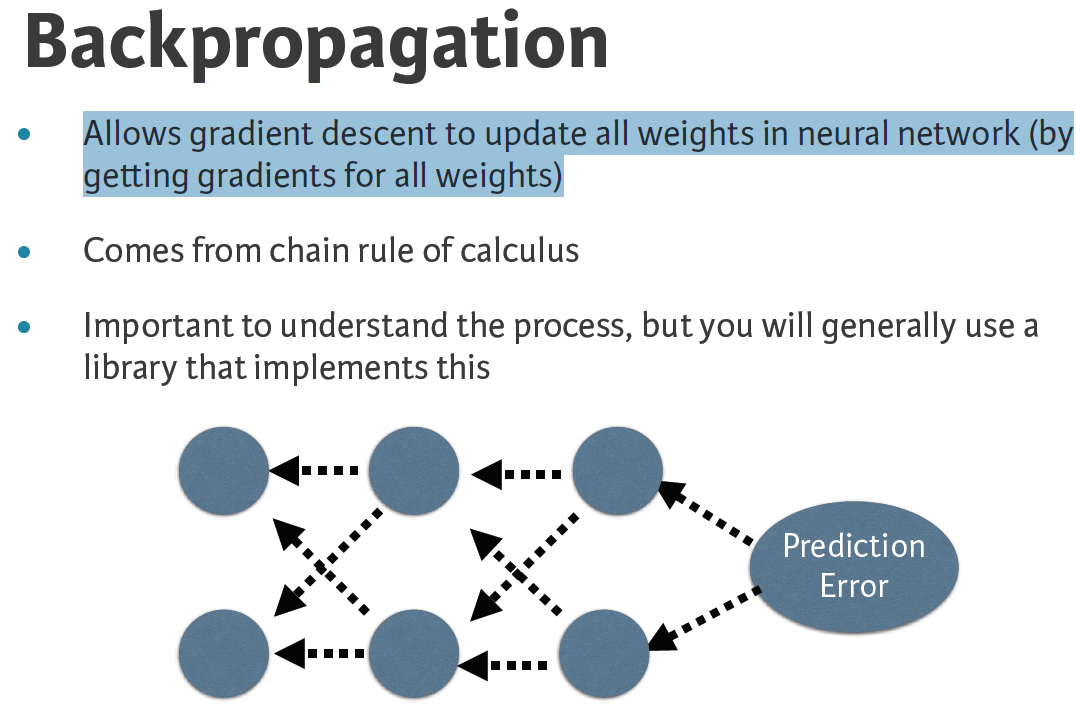

In [1]:
from IPython.display import Image
Image(filename="images/34.png" ,width=500,height=700)

It calculates the slopes sequentially from the weights closet to the predictions, through the hidden layer, eventually back to the weights comming from the inputs. We than use these slopes to update our weights as you've seen. 

Back propagation is tricky. So you should focus on the general structure of the algorithm , rather than memorizing every mathematical details.

In the big picture we are trying to :
    
1. Trying to estimate the slope of the loss function w.r.t each weight in our network

You have already seen that we have used prediction error to calculate the some of those slopes 

2. Do forward propagation to make predictions and calculate an error before we do back propagations

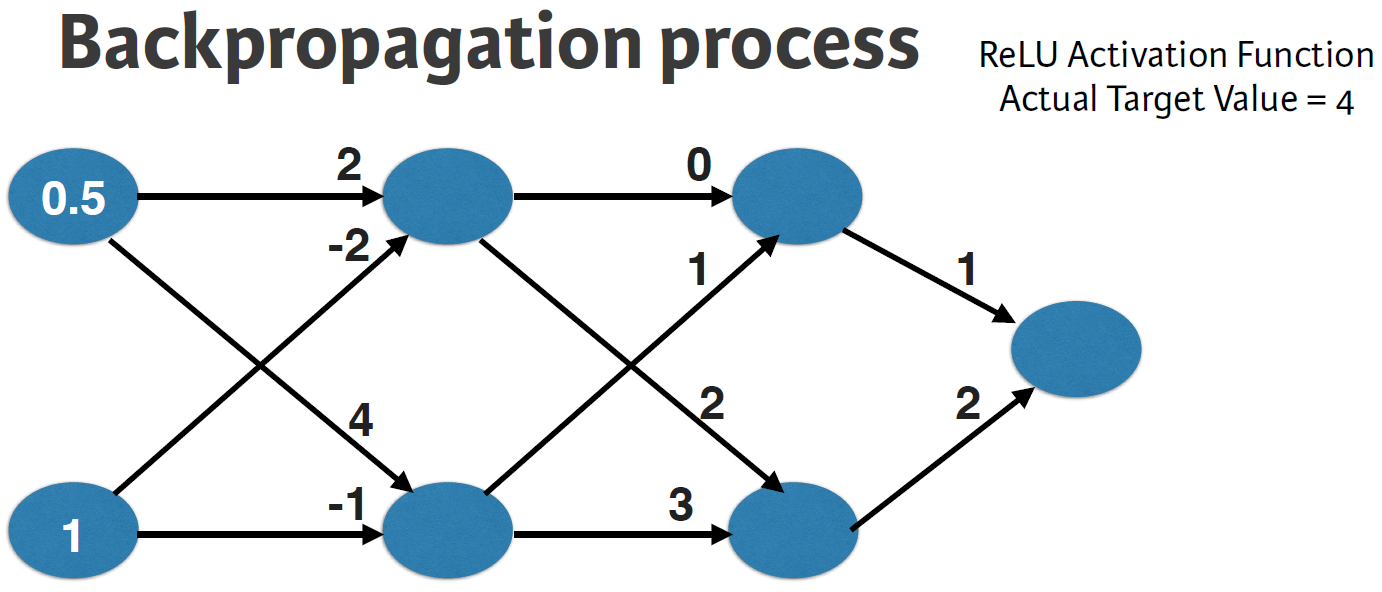

In [2]:
from IPython.display import Image
Image(filename="images/35.png" ,width=500,height=700)

We are using ReLU activation functions. So any node whose input is negative takes a value of 0, and that happens in the top node of the first hidden layer.

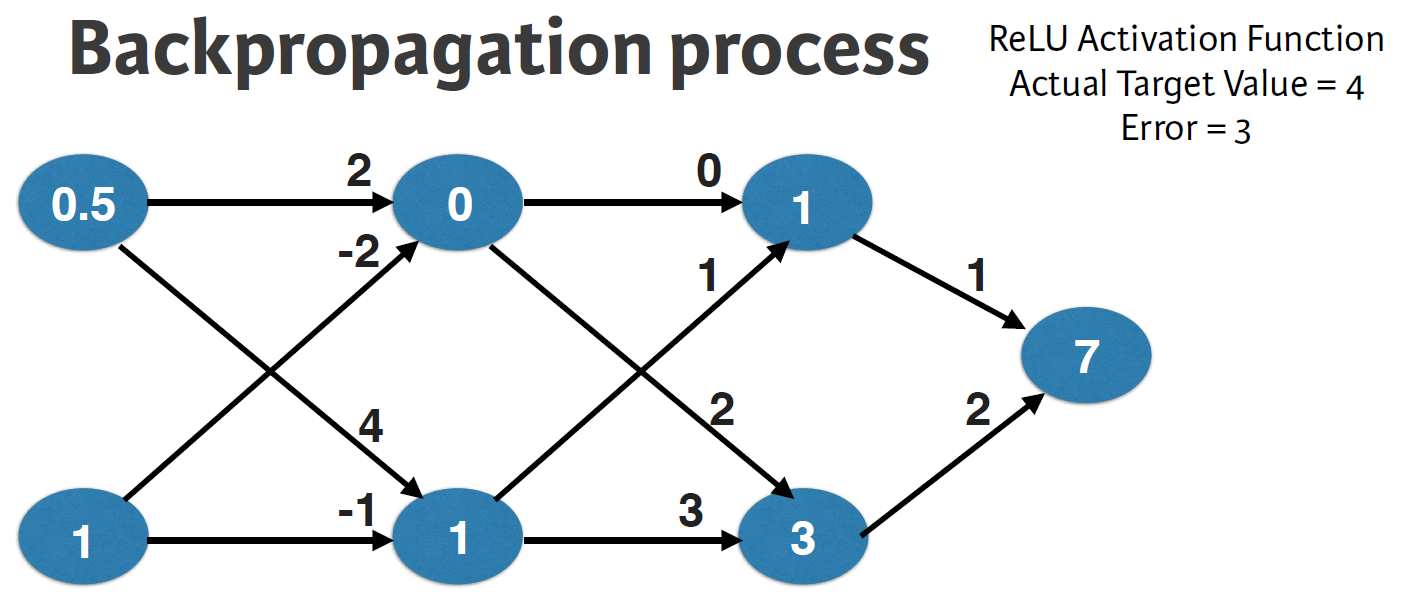

In [3]:
from IPython.display import Image
Image(filename="images/36.png" ,width=500,height=700)

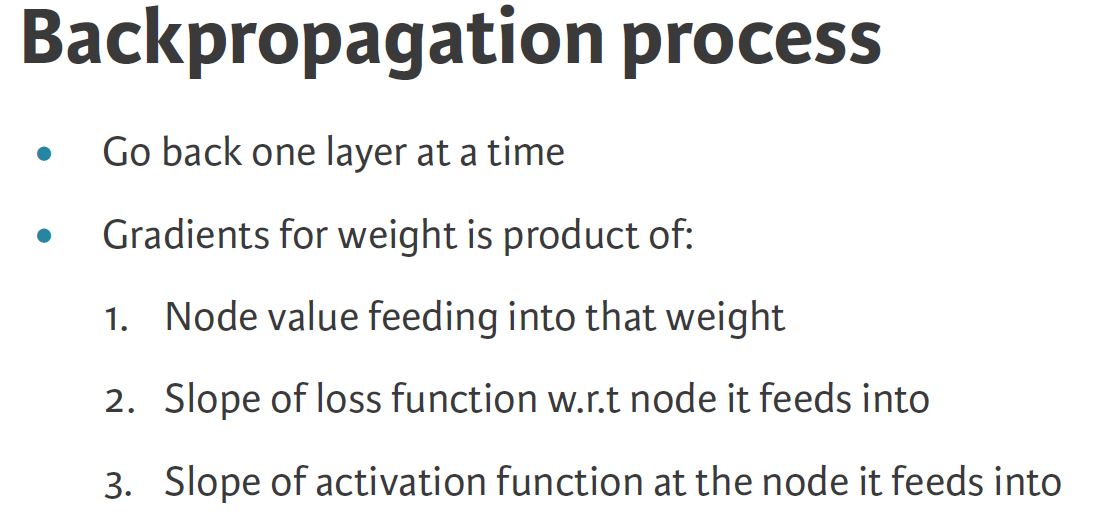

In [4]:
from IPython.display import Image
Image(filename="images/37.png" ,width=500,height=700)

#### 1. Node value feeding into that weight
We know the value at the node feeding into this weight .Either it is in an input layer, in which case we have it from the data Or that node is in the hidden layer , in which case we calculated its values when we did forward propagations.

#### 2. Slope of the loss function w.r.t node it feeds into

We do backward propagation from the right side of our diagram to the left.So we already calculated the slope by the time we plug into the current calculations.

#### 3. Slope of the activation function at the node it feeds 

Finally we need the slope of the activation function at the node it feeds into.

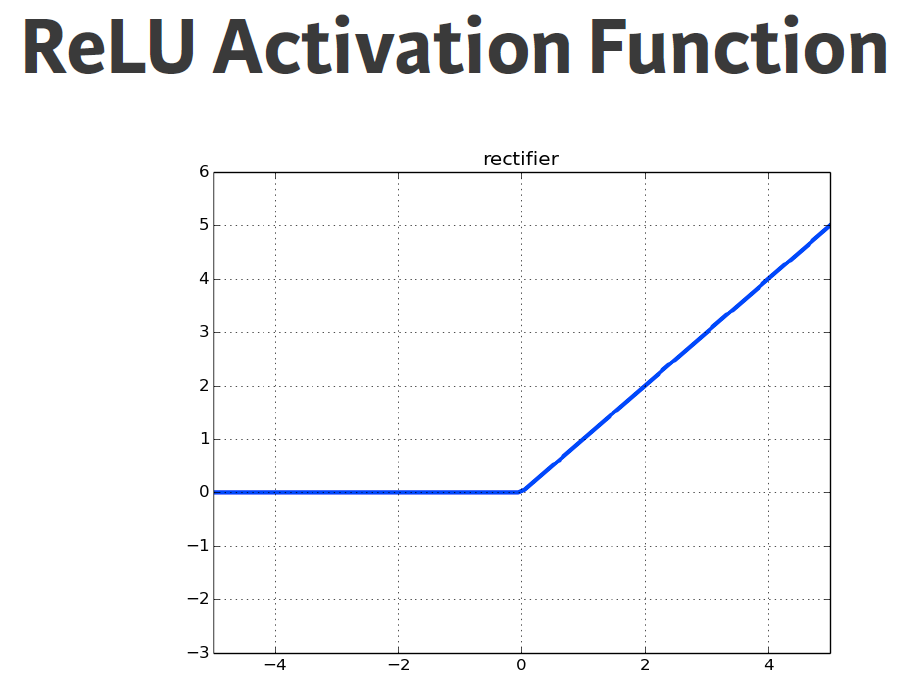

In [6]:
from IPython.display import Image
Image(filename="images/38.png" ,width=400,height=700)

You can see from the diagram that for the ReLu function , the slope is 0 if the input into a node is negative.If the input into the node is positive ,the output is the same as the input. so the slope will be 1 .

**So far we have focused on calculating slopes of the loss function w.r.t weights.**

- We need to keep track of the slopes of the loss functions w.r.t nodes values. because we use those slopes in our calculation of slopes at weights

- The slope of the loss function w.r.t any node value is the sum of the slopes for every weight comming into that node. 

# Backpropagation in practice

let's see Back propagation in deeper network

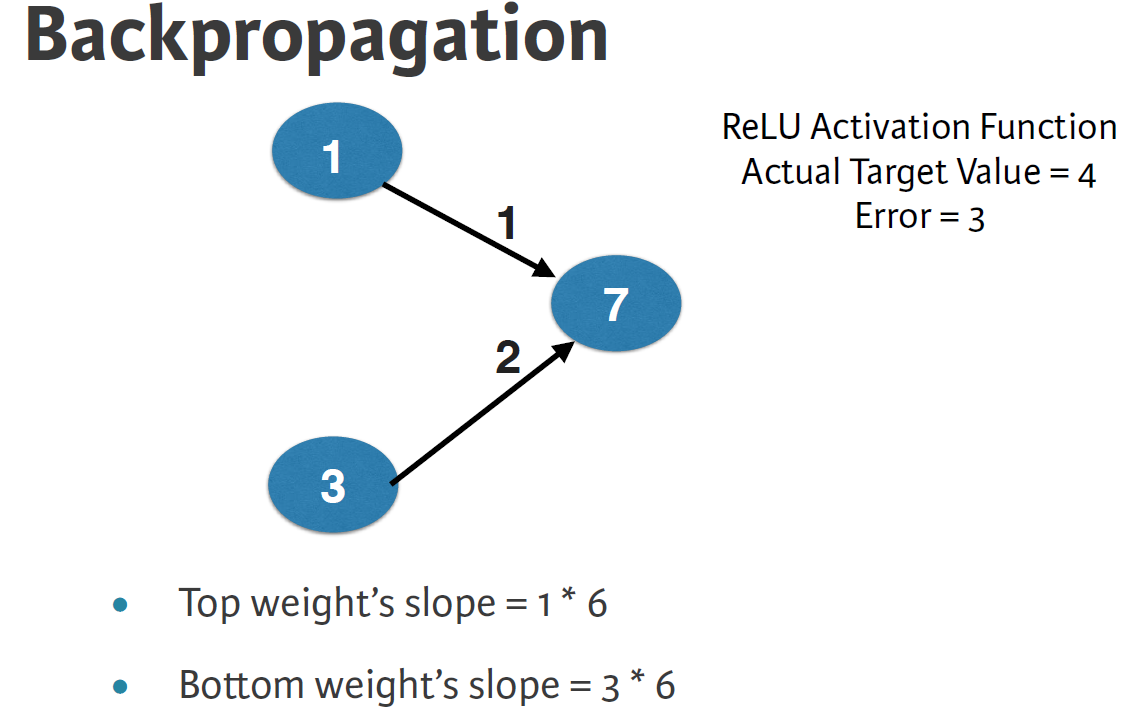

In [8]:
from IPython.display import Image
Image(filename="images/39.png" ,width=400,height=700)

1. Start at the last set of weights those are currently 1 and 2.

we multiply three things:
1. The node values feeding into these weights are 1 and 3 
2. The relevant slope for the outer node is 2 times the error. that 2 * 3 = 6
3. Slope of the activation function is 1. since the output node is positive.


- so we have slope for the top weight is 1 x (2 x 3)x1 =6
- Slope for the bottom weight is 3 x (2 x 3)x1 = 18

The slopes that we calculated feed into the formaula associated with weights further back in the network. Lets do the calculation one layer back now

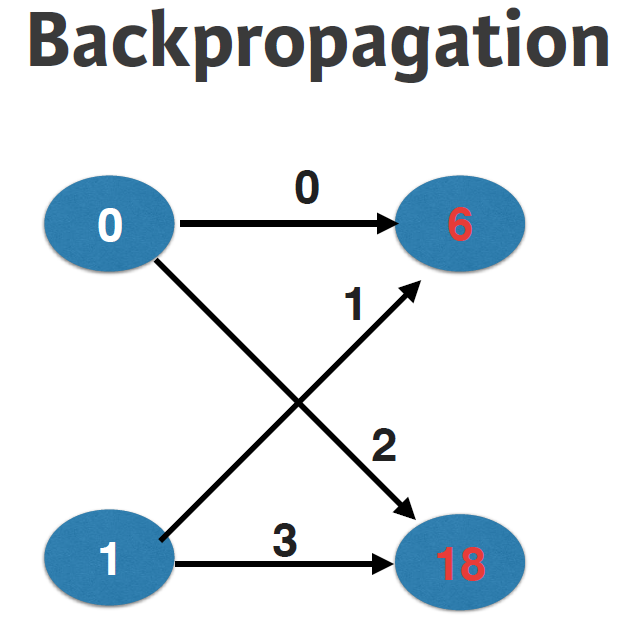

In [23]:
from IPython.display import Image
Image(filename="images/40.png" ,width=300,height=700)

We've hidden the earlier and latter layers .Since we dont need them to calculate the slopes for this layer of the network. This graph used white to denote node values, black to denote weight values an the red shows the calculated slopes of the loss function w.r.t to that node, which we just finished calculating. This is all the information we need to calculate the slopes of the loss function w.r.t weights in this diagram.

# Calculating slopes associated with any weight

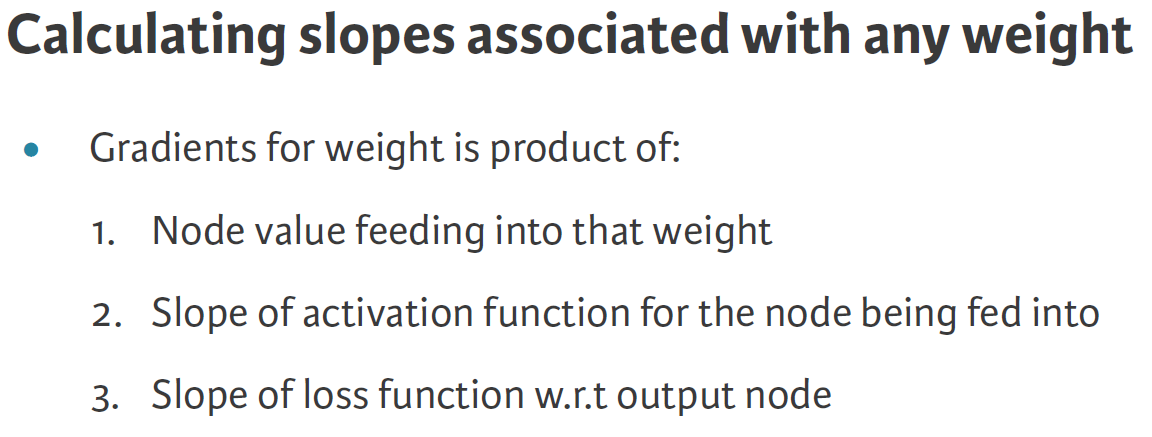

In [11]:
from IPython.display import Image
Image(filename="images/41.png" ,width=500,height=700)

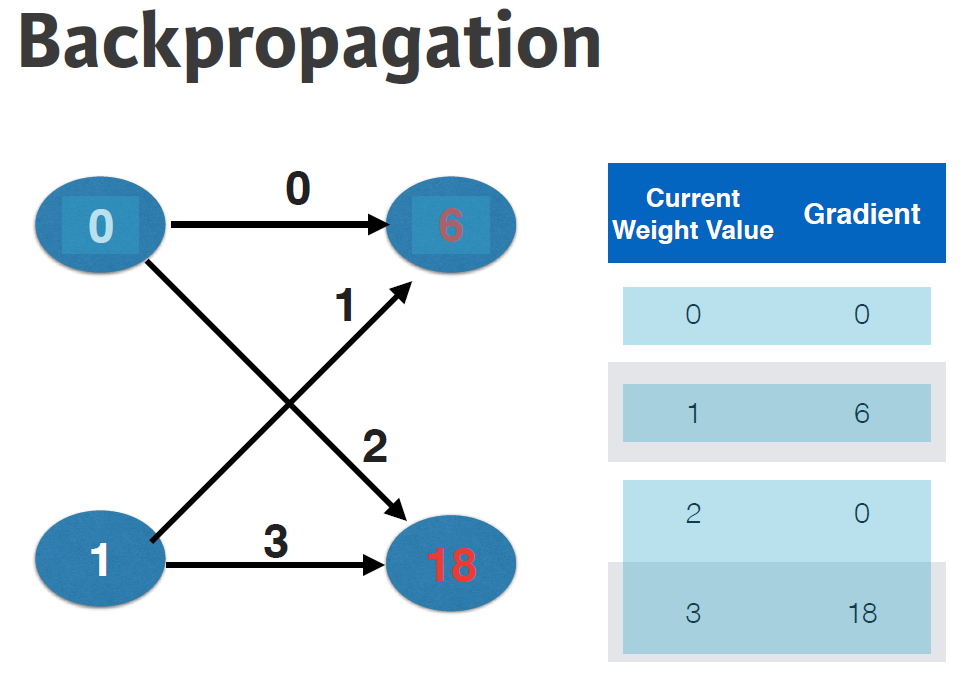

In [15]:
from IPython.display import Image
Image(filename="images/42.png" ,width=500,height=700)

For the top weight going into the top node , we multiply **(0 for the input node's value, which is white) times (6 for the output node slope which is in red) times (the derivative of the ReLUactivation function)** 

That output node has a positive value for the input, so the ReLu activation has slope of 1. ( 0 times 6 times 1 is 0)

For the other weight going into this node we have 1 times 6 times the slope of the ReLU activation functions at the output node value. The slope of the activation function is still 1.
so we have 1 times 6 times 1, which is 6

Here we also show the slopes associated with other two weights.

So we got the gradient for all the weights . Now we would multiply them all by learning rate, and use the result to update the weight in the gradient decent.

# BackPropagation : Recap

1. Start with a random set of weights.
2. We then go through the following iterative process .Use forward propagation to make prediction 
3. Use backward propgation  to calculate the slope of the loss function with respect to each weight
4. Multiply that slope by the learning rate and substract from the current weights
5. Keep going with that cycle until we get a flat part


# Stochastic gradient descent

- For computational efficiency, It is common to calculate slope on only a subset of data, called batch, for each update for the weights.
- You then use a different batch of data to calculate the next update.
- Once you have used all our data, we start over again at the begining of the data.
- Each time through the traing data is called an epoch.
- So for going through our data for the third time, we'd say we are on the 3rd epoch.
- When slopes are calculated on one batch at a time , rather than full data, that is called stochastic gradient decent, rather than gradient descent. which uses all of the data for each slopes calculation

This process will be partially automated for you but understanding this process will help fix any surprise that come up when building your models


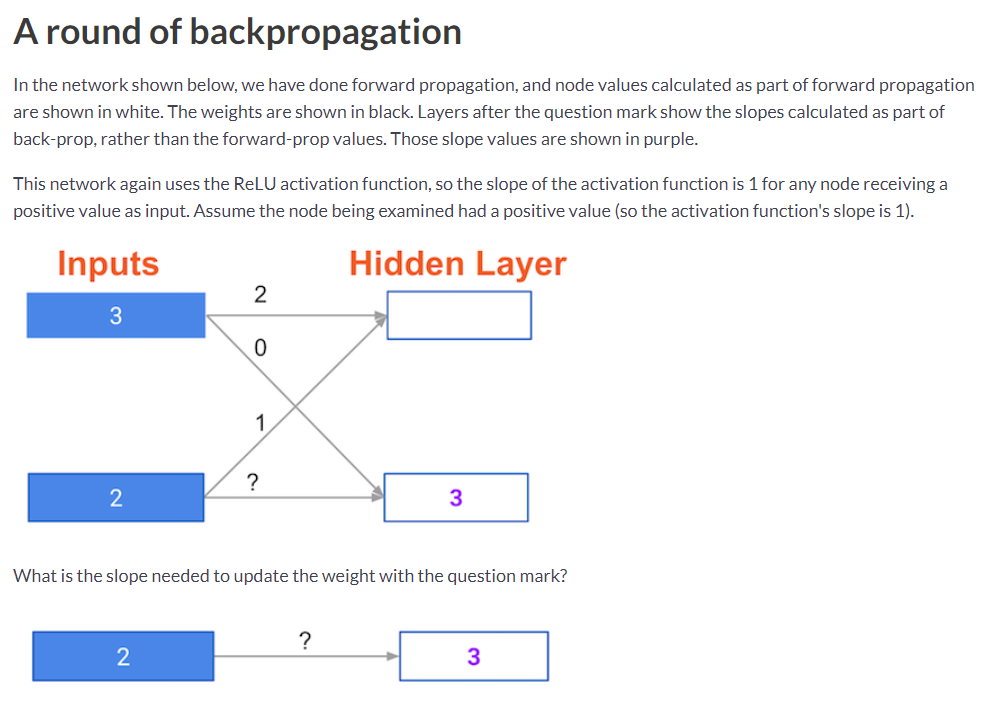

In [18]:
from IPython.display import Image
Image(filename="images/43.png" ,width=700,height=700)